In [1]:
#Importing pandas
import pandas as pd
#Importing numpy
import numpy as np
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#Importing integration package
import scipy.integrate as integrate

In [2]:
#Importing income raw data
df1 = pd.read_csv('rawincomedata.csv')
#Importing race raw data
df2 = pd.read_csv('rawracedata.csv')

In [3]:
#Displaying income raw data
df1


,YEAR,STATEFIP,INCTOT
0,1980,23,18919
1,1980,23,8203
2,1980,23,13680
3,1980,23,2802
4,1980,23,0
...,...,...,...
688179,1983,15,999999999
688180,1983,15,35002
688181,1983,15,8502
688182,1983,15,0


In [4]:
#Displaying race raw data
df2

,YEAR,STATEFIP,RACE
0,1980,23,100
1,1980,23,100
2,1980,23,100
3,1980,23,100
4,1980,23,100
...,...,...,...
688179,1983,15,100
688180,1983,15,100
688181,1983,15,100
688182,1983,15,100


In [5]:
#Counting the number of null values in race data
countnull = 0
for x in df2["RACE"]:
    if x == None:
        countnull = countnull+1
print(countnull)

0


In [6]:
#Counting the number of values greater than ten million, 9999999, one million, 999999, hundred thousand, ten thousand, one thousand and less than zero respectively.
counttenmillion = 0
for x in df1["INCTOT"]:
    if 10000000 < x:
        counttenmillion = counttenmillion+1
print("Number of incomes greater than ten million = " + str(counttenmillion))
counttenmillionlessone = 0
for x in df1["INCTOT"]:
    if 9999999 < x:
        counttenmillionlessone = counttenmillionlessone+1
print("Number of incomes greater than seven figures = " + str(counttenmillionlessone))
countmillion = 0
for x in df1["INCTOT"]:
    if 1000000 < x:
        countmillion = countmillion+1
print("Number of incomes greater than one million = " + str(counttenmillion))
countmillion = 0
for x in df1["INCTOT"]:
    if 999999 < x:
        countmillion = countmillion+1
print("Number of incomes greater than six figures = " + str(countmillion))
countlakh = 0
for x in df1["INCTOT"]:
    if 99999 < x:
        countlakh = countlakh+1
print("Number of incomes greater than a lakh = " + str(countlakh))
countlakhs = 0
for x in df1["INCTOT"]:
    if 9999 < x:
        countlakhs = countlakhs+1
print("Number of incomes in lakhs = " + str(countlakhs))
countthousand = 0
for x in df1["INCTOT"]:
    if 999 < x:
        countthousand = countthousand+1
print("Number of incomes greater than a thousand = " + str(countthousand))
countzero = 0
for x in df1["INCTOT"]:
    if x == 0:
        countzero = countzero+1
print("Number of people unemployed = " + str(countzero))
countneg = 0
for x in df1["INCTOT"]:
    if 0 > x:
        countneg = countneg+1
print("Number of people unemployed and on government assistance = " + str(countneg))

Number of incomes greater than ten million = 164506
Number of incomes greater than seven figures = 164506
Number of incomes greater than one million = 164506
Number of incomes greater than six figures = 164506
Number of incomes greater than a lakh = 164683
Number of incomes in lakhs = 368763
Number of incomes greater than a thousand = 589688
Number of people unemployed = 44076
Number of people unemployed and on government assistance = 2665


The reason the number of incomes below 10 million, 7 figure-salaries, one million, six figures, a lakh, ten thousand, one thousand, exactly zero and negative were counted was two-fold. Firstly, all numbers in the orginal csv file were getting set to 999999999 by default if they were a large value. I wanted to find what the value above which these values were getting set to 999999999 by default. I found out it was one million as predicted. However, it may very well be that the numbers being set to 999999999 by default were getting set that way due to some other reason like being null or something. I don't know yet but will find out later.

In [7]:
#Creating dataframe with positive values less than ten million. The reason I did this was because while downloading the 
#data from IPUMS CPS many values were automatically getting set to 999999999 and so I just split the data with this dataset
#having the known values. I will fill in the mean of all the unknown values later after calculating it for each year.
df3 = df1[(df1.INCTOT<10000000)]

In [8]:
#Displaying income dataframe
df3

,YEAR,STATEFIP,INCTOT
0,1980,23,18919
1,1980,23,8203
2,1980,23,13680
3,1980,23,2802
4,1980,23,0
...,...,...,...
688177,1983,15,33011
688178,1983,15,3338
688180,1983,15,35002
688181,1983,15,8502


In [9]:
#Seeing the number of rows and columns in df3.
df3.shape

(523678, 3)

In [10]:
#This calculation was performed to verify the correct values were used. 
#Number of total original values - Number of values greater than a million = Number of current values in this set
688184-164506

523678

There were originally 521013 values, 164506 values greater than a million and 2665 negative values).

In [11]:
#Creating a dataframe with only 700,200 and 100 as values
df4 = df2[((df2.RACE==700) | (df2.RACE==200) | (df2.RACE==100))]

In [12]:
#Displaying race dataframe
df4 

,YEAR,STATEFIP,RACE
0,1980,23,100
1,1980,23,100
2,1980,23,100
3,1980,23,100
4,1980,23,100
...,...,...,...
688179,1983,15,100
688180,1983,15,100
688181,1983,15,100
688182,1983,15,100


In [13]:
#Counting the number of rows and columns in the race dataframe
df4.shape

(688184, 3)

In [14]:
#Splitting race and income dataframes by year
dfinc1980 = df3[df3["YEAR"] == 1980]
dfinc1981 = df3[df3["YEAR"] == 1981]
dfinc1982 = df3[df3["YEAR"] == 1982]
dfinc1983 = df3[df3["YEAR"] == 1983]
dfrace1980 = df4[df4["YEAR"] == 1980]
dfrace1981 = df4[df4["YEAR"] == 1981]
dfrace1982 = df4[df4["YEAR"] == 1982]
dfrace1983 = df4[df4["YEAR"] == 1983]

In [15]:
#Creating a dataframe with only values greater than a million to get what the average income of millionaires in each state was
#and the total number of millionaires in each state.
df5 = df1[(df1.INCTOT>10000000)]

In [16]:
list(df5["INCTOT"].unique())

[999999999]

This confirms we have only dropped the values which were getting mutated to 999999999.

In [17]:
#Splitting dataframes with high, low and all incomes by year
dfallinc1980 = df1[df1["YEAR"] == 1980]
dfallinc1981 = df1[df1["YEAR"] == 1981]
dfallinc1982 = df1[df1["YEAR"] == 1982]
dfallinc1983 = df1[df1["YEAR"] == 1983]
dfhighinc1980 = df5[df5["YEAR"] == 1980]
dfhighinc1981 = df5[df5["YEAR"] == 1981]
dfhighinc1982 = df5[df5["YEAR"] == 1982]
dfhighinc1983 = df5[df5["YEAR"] == 1983]
df1980poverty = dfinc1980[dfinc1980["INCTOT"] <4160]
df1981poverty = dfinc1981[dfinc1981["INCTOT"] <4620]
df1982poverty = dfinc1982[dfinc1982["INCTOT"] <4901]
df1983poverty = dfinc1983[dfinc1983["INCTOT"] <5061]

Poverty lines were different for different years.

In [18]:
#Printing the codes for the states(e.g 1=Alabama)
dfinc1980["STATEFIP"].unique()

array([23, 33, 50, 25, 44,  9, 36, 34, 42, 39, 18, 17, 26, 55, 27, 19, 29,
       38, 46, 31, 20, 10, 24, 11, 51, 54, 37, 45, 13, 12, 21, 47,  1, 28,
        5, 22, 40, 48, 30, 16, 56,  8, 35,  4, 49, 32, 53, 41,  6,  2, 15],
      dtype=int64)

Since these are non-linear code values, they will have to be split manually.

In [19]:
#Sorting values by state codes in ascending order for 1980 income data
dfinc1980 = dfinc1980.sort_values(by="STATEFIP")
#Sorting values by state codes in ascending order for 1981 income data
dfinc1981 = dfinc1981.sort_values(by="STATEFIP")
#Sorting values by state codes in ascending order for 1982 income data
dfinc1982 = dfinc1982.sort_values(by="STATEFIP")
#Sorting values by state codes in ascending order for 1983 income data
dfinc1983 = dfinc1983.sort_values(by="STATEFIP")
#Sorting values by state codes in ascending order for 1980 race data
dfrace1980 = dfrace1980.sort_values(by="STATEFIP")
#Sorting values by state codes in ascending order for 1981 race data
dfrace1981 = dfrace1981.sort_values(by="STATEFIP")
#Sorting values by state codes in ascending order for 1982 race data
dfrace1982 = dfrace1982.sort_values(by="STATEFIP")
#Sorting values by state codes in ascending order for 1983 race data
dfrace1983 = dfrace1983.sort_values(by="STATEFIP")

In [20]:
#Splitting income data by state and year into separate dataframes
#1980
dfinc1980Alabama = dfinc1980[dfinc1980["STATEFIP"] == 1]
dfinc1980Alaska = dfinc1980[dfinc1980["STATEFIP"] == 2]
dfinc1980Arizona = dfinc1980[dfinc1980["STATEFIP"] == 4]
dfinc1980Arkansas = dfinc1980[dfinc1980["STATEFIP"] == 5]
dfinc1980California = dfinc1980[dfinc1980["STATEFIP"] == 6]
dfinc1980Colorado = dfinc1980[dfinc1980["STATEFIP"] == 8]
dfinc1980Connecticut = dfinc1980[dfinc1980["STATEFIP"] == 9]
dfinc1980Delaware = dfinc1980[dfinc1980["STATEFIP"] == 10]
dfinc1980DC = dfinc1980[dfinc1980["STATEFIP"] == 11]
dfinc1980Florida = dfinc1980[dfinc1980["STATEFIP"] == 12]
dfinc1980Georgia = dfinc1980[dfinc1980["STATEFIP"] == 13]
dfinc1980Hawaii = dfinc1980[dfinc1980["STATEFIP"] == 15]
dfinc1980Idaho = dfinc1980[dfinc1980["STATEFIP"] == 16]
dfinc1980Illinois = dfinc1980[dfinc1980["STATEFIP"] == 17]
dfinc1980Indiana = dfinc1980[dfinc1980["STATEFIP"] == 18]
dfinc1980Iowa = dfinc1980[dfinc1980["STATEFIP"] == 19]
dfinc1980Kansas = dfinc1980[dfinc1980["STATEFIP"] == 20]
dfinc1980Kentucky = dfinc1980[dfinc1980["STATEFIP"] == 21]
dfinc1980Louisiana = dfinc1980[dfinc1980["STATEFIP"] == 22]
dfinc1980Maine = dfinc1980[dfinc1980["STATEFIP"] == 23]
dfinc1980Maryland = dfinc1980[dfinc1980["STATEFIP"] == 24]
dfinc1980Massachusetts = dfinc1980[dfinc1980["STATEFIP"] == 25]
dfinc1980Michigan = dfinc1980[dfinc1980["STATEFIP"] == 26]
dfinc1980Minnesota = dfinc1980[dfinc1980["STATEFIP"] == 27]
dfinc1980Mississippi = dfinc1980[dfinc1980["STATEFIP"] == 28]
dfinc1980Missouri = dfinc1980[dfinc1980["STATEFIP"] == 29]
dfinc1980Montana = dfinc1980[dfinc1980["STATEFIP"] == 30]
dfinc1980Nebraska = dfinc1980[dfinc1980["STATEFIP"] == 31]
dfinc1980Nevada = dfinc1980[dfinc1980["STATEFIP"] == 32]
dfinc1980NewHampshire = dfinc1980[dfinc1980["STATEFIP"] == 33]
dfinc1980NewJersey = dfinc1980[dfinc1980["STATEFIP"] == 34]
dfinc1980NewMexico = dfinc1980[dfinc1980["STATEFIP"] == 35]
dfinc1980NewYork = dfinc1980[dfinc1980["STATEFIP"] == 36]
dfinc1980NorthCarolina = dfinc1980[dfinc1980["STATEFIP"] == 37]
dfinc1980NorthDakota = dfinc1980[dfinc1980["STATEFIP"] == 38]
dfinc1980Ohio = dfinc1980[dfinc1980["STATEFIP"] == 39]
dfinc1980Oklahoma = dfinc1980[dfinc1980["STATEFIP"] == 40]
dfinc1980Oregon = dfinc1980[dfinc1980["STATEFIP"] == 41]
dfinc1980Pennsylvania = dfinc1980[dfinc1980["STATEFIP"] == 42]
dfinc1980RhodeIsland = dfinc1980[dfinc1980["STATEFIP"] == 44]
dfinc1980SouthCarolina = dfinc1980[dfinc1980["STATEFIP"] == 45]
dfinc1980SouthDakota = dfinc1980[dfinc1980["STATEFIP"] == 46]
dfinc1980Tennessee = dfinc1980[dfinc1980["STATEFIP"] == 47]
dfinc1980Texas = dfinc1980[dfinc1980["STATEFIP"] == 48]
dfinc1980Utah = dfinc1980[dfinc1980["STATEFIP"] == 49]
dfinc1980Vermont = dfinc1980[dfinc1980["STATEFIP"] == 50]
dfinc1980Virginia = dfinc1980[dfinc1980["STATEFIP"] == 51]
dfinc1980Washington = dfinc1980[dfinc1980["STATEFIP"] == 53]
dfinc1980WestVirginia = dfinc1980[dfinc1980["STATEFIP"] == 54]
dfinc1980Wisconsin = dfinc1980[dfinc1980["STATEFIP"] == 55]
dfinc1980Wyoming = dfinc1980[dfinc1980["STATEFIP"] == 56]
#1981
dfinc1981Alabama = dfinc1981[dfinc1981["STATEFIP"] == 1]
dfinc1981Alaska = dfinc1981[dfinc1981["STATEFIP"] == 2]
dfinc1981Arizona = dfinc1981[dfinc1981["STATEFIP"] == 4]
dfinc1981Arkansas = dfinc1981[dfinc1981["STATEFIP"] == 5]
dfinc1981California = dfinc1981[dfinc1981["STATEFIP"] == 6]
dfinc1981Colorado = dfinc1981[dfinc1981["STATEFIP"] == 8]
dfinc1981Connecticut = dfinc1981[dfinc1981["STATEFIP"] == 9]
dfinc1981Delaware = dfinc1981[dfinc1981["STATEFIP"] == 10]
dfinc1981DC = dfinc1981[dfinc1981["STATEFIP"] == 11]
dfinc1981Florida = dfinc1981[dfinc1981["STATEFIP"] == 12]
dfinc1981Georgia = dfinc1981[dfinc1981["STATEFIP"] == 13]
dfinc1981Hawaii = dfinc1981[dfinc1981["STATEFIP"] == 15]
dfinc1981Idaho = dfinc1981[dfinc1981["STATEFIP"] == 16]
dfinc1981Illinois = dfinc1981[dfinc1981["STATEFIP"] == 17]
dfinc1981Indiana = dfinc1981[dfinc1981["STATEFIP"] == 18]
dfinc1981Iowa = dfinc1981[dfinc1981["STATEFIP"] == 19]
dfinc1981Kansas = dfinc1981[dfinc1981["STATEFIP"] == 20]
dfinc1981Kentucky = dfinc1981[dfinc1981["STATEFIP"] == 21]
dfinc1981Louisiana = dfinc1981[dfinc1981["STATEFIP"] == 22]
dfinc1981Maine = dfinc1981[dfinc1981["STATEFIP"] == 23]
dfinc1981Maryland = dfinc1981[dfinc1981["STATEFIP"] == 24]
dfinc1981Massachusetts = dfinc1981[dfinc1981["STATEFIP"] == 25]
dfinc1981Michigan = dfinc1981[dfinc1981["STATEFIP"] == 26]
dfinc1981Minnesota = dfinc1981[dfinc1981["STATEFIP"] == 27]
dfinc1981Mississippi = dfinc1981[dfinc1981["STATEFIP"] == 28]
dfinc1981Missouri = dfinc1981[dfinc1981["STATEFIP"] == 29]
dfinc1981Montana = dfinc1981[dfinc1981["STATEFIP"] == 30]
dfinc1981Nebraska = dfinc1981[dfinc1981["STATEFIP"] == 31]
dfinc1981Nevada = dfinc1981[dfinc1981["STATEFIP"] == 32]
dfinc1981NewHampshire = dfinc1981[dfinc1981["STATEFIP"] == 33]
dfinc1981NewJersey = dfinc1981[dfinc1981["STATEFIP"] == 34]
dfinc1981NewMexico = dfinc1981[dfinc1981["STATEFIP"] == 35]
dfinc1981NewYork = dfinc1981[dfinc1981["STATEFIP"] == 36]
dfinc1981NorthCarolina = dfinc1981[dfinc1981["STATEFIP"] == 37]
dfinc1981NorthDakota = dfinc1981[dfinc1981["STATEFIP"] == 38]
dfinc1981Ohio = dfinc1981[dfinc1981["STATEFIP"] == 39]
dfinc1981Oklahoma = dfinc1981[dfinc1981["STATEFIP"] == 40]
dfinc1981Oregon = dfinc1981[dfinc1981["STATEFIP"] == 41]
dfinc1981Pennsylvania = dfinc1981[dfinc1981["STATEFIP"] == 42]
dfinc1981RhodeIsland = dfinc1981[dfinc1981["STATEFIP"] == 44]
dfinc1981SouthCarolina = dfinc1981[dfinc1981["STATEFIP"] == 45]
dfinc1981SouthDakota = dfinc1981[dfinc1981["STATEFIP"] == 46]
dfinc1981Tennessee = dfinc1981[dfinc1981["STATEFIP"] == 47]
dfinc1981Texas = dfinc1981[dfinc1981["STATEFIP"] == 48]
dfinc1981Utah = dfinc1981[dfinc1981["STATEFIP"] == 49]
dfinc1981Vermont = dfinc1981[dfinc1981["STATEFIP"] == 50]
dfinc1981Virginia = dfinc1981[dfinc1981["STATEFIP"] == 51]
dfinc1981Washington = dfinc1981[dfinc1981["STATEFIP"] == 53]
dfinc1981WestVirginia = dfinc1981[dfinc1981["STATEFIP"] == 54]
dfinc1981Wisconsin = dfinc1981[dfinc1981["STATEFIP"] == 55]
dfinc1981Wyoming = dfinc1981[dfinc1981["STATEFIP"] == 56]
#1982
dfinc1982Alabama = dfinc1982[dfinc1982["STATEFIP"] == 1]
dfinc1982Alaska = dfinc1982[dfinc1982["STATEFIP"] == 2]
dfinc1982Arizona = dfinc1982[dfinc1982["STATEFIP"] == 4]
dfinc1982Arkansas = dfinc1982[dfinc1982["STATEFIP"] == 5]
dfinc1982California = dfinc1982[dfinc1982["STATEFIP"] == 6]
dfinc1982Colorado = dfinc1982[dfinc1982["STATEFIP"] == 8]
dfinc1982Connecticut = dfinc1982[dfinc1982["STATEFIP"] == 9]
dfinc1982Delaware = dfinc1982[dfinc1982["STATEFIP"] == 10]
dfinc1982DC = dfinc1982[dfinc1982["STATEFIP"] == 11]
dfinc1982Florida = dfinc1982[dfinc1982["STATEFIP"] == 12]
dfinc1982Georgia = dfinc1982[dfinc1982["STATEFIP"] == 13]
dfinc1982Hawaii = dfinc1982[dfinc1982["STATEFIP"] == 15]
dfinc1982Idaho = dfinc1982[dfinc1982["STATEFIP"] == 16]
dfinc1982Illinois = dfinc1982[dfinc1982["STATEFIP"] == 17]
dfinc1982Indiana = dfinc1982[dfinc1982["STATEFIP"] == 18]
dfinc1982Iowa = dfinc1982[dfinc1982["STATEFIP"] == 19]
dfinc1982Kansas = dfinc1982[dfinc1982["STATEFIP"] == 20]
dfinc1982Kentucky = dfinc1982[dfinc1982["STATEFIP"] == 21]
dfinc1982Louisiana = dfinc1982[dfinc1982["STATEFIP"] == 22]
dfinc1982Maine = dfinc1982[dfinc1982["STATEFIP"] == 23]
dfinc1982Maryland = dfinc1982[dfinc1982["STATEFIP"] == 24]
dfinc1982Massachusetts = dfinc1982[dfinc1982["STATEFIP"] == 25]
dfinc1982Michigan = dfinc1982[dfinc1982["STATEFIP"] == 26]
dfinc1982Minnesota = dfinc1982[dfinc1982["STATEFIP"] == 27]
dfinc1982Mississippi = dfinc1982[dfinc1982["STATEFIP"] == 28]
dfinc1982Missouri = dfinc1982[dfinc1982["STATEFIP"] == 29]
dfinc1982Montana = dfinc1982[dfinc1982["STATEFIP"] == 30]
dfinc1982Nebraska = dfinc1982[dfinc1982["STATEFIP"] == 31]
dfinc1982Nevada = dfinc1982[dfinc1982["STATEFIP"] == 32]
dfinc1982NewHampshire = dfinc1982[dfinc1982["STATEFIP"] == 33]
dfinc1982NewJersey = dfinc1982[dfinc1982["STATEFIP"] == 34]
dfinc1982NewMexico = dfinc1982[dfinc1982["STATEFIP"] == 35]
dfinc1982NewYork = dfinc1982[dfinc1982["STATEFIP"] == 36]
dfinc1982NorthCarolina = dfinc1982[dfinc1982["STATEFIP"] == 37]
dfinc1982NorthDakota = dfinc1982[dfinc1982["STATEFIP"] == 38]
dfinc1982Ohio = dfinc1982[dfinc1982["STATEFIP"] == 39]
dfinc1982Oklahoma = dfinc1982[dfinc1982["STATEFIP"] == 40]
dfinc1982Oregon = dfinc1982[dfinc1982["STATEFIP"] == 41]
dfinc1982Pennsylvania = dfinc1982[dfinc1982["STATEFIP"] == 42]
dfinc1982RhodeIsland = dfinc1982[dfinc1982["STATEFIP"] == 44]
dfinc1982SouthCarolina = dfinc1982[dfinc1982["STATEFIP"] == 45]
dfinc1982SouthDakota = dfinc1982[dfinc1982["STATEFIP"] == 46]
dfinc1982Tennessee = dfinc1982[dfinc1982["STATEFIP"] == 47]
dfinc1982Texas = dfinc1982[dfinc1982["STATEFIP"] == 48]
dfinc1982Utah = dfinc1982[dfinc1982["STATEFIP"] == 49]
dfinc1982Vermont = dfinc1982[dfinc1982["STATEFIP"] == 50]
dfinc1982Virginia = dfinc1982[dfinc1982["STATEFIP"] == 51]
dfinc1982Washington = dfinc1982[dfinc1982["STATEFIP"] == 53]
dfinc1982WestVirginia = dfinc1982[dfinc1982["STATEFIP"] == 54]
dfinc1982Wisconsin = dfinc1982[dfinc1982["STATEFIP"] == 55]
dfinc1982Wyoming = dfinc1982[dfinc1982["STATEFIP"] == 56]
#1983
dfinc1983Alabama = dfinc1983[dfinc1983["STATEFIP"] == 1]
dfinc1983Alaska = dfinc1983[dfinc1983["STATEFIP"] == 2]
dfinc1983Arizona = dfinc1983[dfinc1983["STATEFIP"] == 4]
dfinc1983Arkansas = dfinc1983[dfinc1983["STATEFIP"] == 5]
dfinc1983California = dfinc1983[dfinc1983["STATEFIP"] == 6]
dfinc1983Colorado = dfinc1983[dfinc1983["STATEFIP"] == 8]
dfinc1983Connecticut = dfinc1983[dfinc1983["STATEFIP"] == 9]
dfinc1983Delaware = dfinc1983[dfinc1983["STATEFIP"] == 10]
dfinc1983DC = dfinc1983[dfinc1983["STATEFIP"] == 11]
dfinc1983Florida = dfinc1983[dfinc1983["STATEFIP"] == 12]
dfinc1983Georgia = dfinc1983[dfinc1983["STATEFIP"] == 13]
dfinc1983Hawaii = dfinc1983[dfinc1983["STATEFIP"] == 15]
dfinc1983Idaho = dfinc1983[dfinc1983["STATEFIP"] == 16]
dfinc1983Illinois = dfinc1983[dfinc1983["STATEFIP"] == 17]
dfinc1983Indiana = dfinc1983[dfinc1983["STATEFIP"] == 18]
dfinc1983Iowa = dfinc1983[dfinc1983["STATEFIP"] == 19]
dfinc1983Kansas = dfinc1983[dfinc1983["STATEFIP"] == 20]
dfinc1983Kentucky = dfinc1983[dfinc1983["STATEFIP"] == 21]
dfinc1983Louisiana = dfinc1983[dfinc1983["STATEFIP"] == 22]
dfinc1983Maine = dfinc1983[dfinc1983["STATEFIP"] == 23]
dfinc1983Maryland = dfinc1983[dfinc1983["STATEFIP"] == 24]
dfinc1983Massachusetts = dfinc1983[dfinc1983["STATEFIP"] == 25]
dfinc1983Michigan = dfinc1983[dfinc1983["STATEFIP"] == 26]
dfinc1983Minnesota = dfinc1983[dfinc1983["STATEFIP"] == 27]
dfinc1983Mississippi = dfinc1983[dfinc1983["STATEFIP"] == 28]
dfinc1983Missouri = dfinc1983[dfinc1983["STATEFIP"] == 29]
dfinc1983Montana = dfinc1983[dfinc1983["STATEFIP"] == 30]
dfinc1983Nebraska = dfinc1983[dfinc1983["STATEFIP"] == 31]
dfinc1983Nevada = dfinc1983[dfinc1983["STATEFIP"] == 32]
dfinc1983NewHampshire = dfinc1983[dfinc1983["STATEFIP"] == 33]
dfinc1983NewJersey = dfinc1983[dfinc1983["STATEFIP"] == 34]
dfinc1983NewMexico = dfinc1983[dfinc1983["STATEFIP"] == 35]
dfinc1983NewYork = dfinc1983[dfinc1983["STATEFIP"] == 36]
dfinc1983NorthCarolina = dfinc1983[dfinc1983["STATEFIP"] == 37]
dfinc1983NorthDakota = dfinc1983[dfinc1983["STATEFIP"] == 38]
dfinc1983Ohio = dfinc1983[dfinc1983["STATEFIP"] == 39]
dfinc1983Oklahoma = dfinc1983[dfinc1983["STATEFIP"] == 40]
dfinc1983Oregon = dfinc1983[dfinc1983["STATEFIP"] == 41]
dfinc1983Pennsylvania = dfinc1983[dfinc1983["STATEFIP"] == 42]
dfinc1983RhodeIsland = dfinc1983[dfinc1983["STATEFIP"] == 44]
dfinc1983SouthCarolina = dfinc1983[dfinc1983["STATEFIP"] == 45]
dfinc1983SouthDakota = dfinc1983[dfinc1983["STATEFIP"] == 46]
dfinc1983Tennessee = dfinc1983[dfinc1983["STATEFIP"] == 47]
dfinc1983Texas = dfinc1983[dfinc1983["STATEFIP"] == 48]
dfinc1983Utah = dfinc1983[dfinc1983["STATEFIP"] == 49]
dfinc1983Vermont = dfinc1983[dfinc1983["STATEFIP"] == 50]
dfinc1983Virginia = dfinc1983[dfinc1983["STATEFIP"] == 51]
dfinc1983Washington = dfinc1983[dfinc1983["STATEFIP"] == 53]
dfinc1983WestVirginia = dfinc1983[dfinc1983["STATEFIP"] == 54]
dfinc1983Wisconsin = dfinc1983[dfinc1983["STATEFIP"] == 55]
dfinc1983Wyoming = dfinc1983[dfinc1983["STATEFIP"] == 56]

In [21]:
#Splitting race data by state and year into separate dataframes
#1980
dfrace1980Alabama = dfrace1980[dfrace1980["STATEFIP"] == 1]
dfrace1980Alaska = dfrace1980[dfrace1980["STATEFIP"] == 2]
dfrace1980Arizona = dfrace1980[dfrace1980["STATEFIP"] == 4]
dfrace1980Arkansas = dfrace1980[dfrace1980["STATEFIP"] == 5]
dfrace1980California = dfrace1980[dfrace1980["STATEFIP"] == 6]
dfrace1980Colorado = dfrace1980[dfrace1980["STATEFIP"] == 8]
dfrace1980Connecticut = dfrace1980[dfrace1980["STATEFIP"] == 9]
dfrace1980Delaware = dfrace1980[dfrace1980["STATEFIP"] == 10]
dfrace1980DC = dfrace1980[dfrace1980["STATEFIP"] == 11]
dfrace1980Florida = dfrace1980[dfrace1980["STATEFIP"] == 12]
dfrace1980Georgia = dfrace1980[dfrace1980["STATEFIP"] == 13]
dfrace1980Hawaii = dfrace1980[dfrace1980["STATEFIP"] == 15]
dfrace1980Idaho = dfrace1980[dfrace1980["STATEFIP"] == 16]
dfrace1980Illinois = dfrace1980[dfrace1980["STATEFIP"] == 17]
dfrace1980Indiana = dfrace1980[dfrace1980["STATEFIP"] == 18]
dfrace1980Iowa = dfrace1980[dfrace1980["STATEFIP"] == 19]
dfrace1980Kansas = dfrace1980[dfrace1980["STATEFIP"] == 20]
dfrace1980Kentucky = dfrace1980[dfrace1980["STATEFIP"] == 21]
dfrace1980Louisiana = dfrace1980[dfrace1980["STATEFIP"] == 22]
dfrace1980Maine = dfrace1980[dfrace1980["STATEFIP"] == 23]
dfrace1980Maryland = dfrace1980[dfrace1980["STATEFIP"] == 24]
dfrace1980Massachusetts = dfrace1980[dfrace1980["STATEFIP"] == 25]
dfrace1980Michigan = dfrace1980[dfrace1980["STATEFIP"] == 26]
dfrace1980Minnesota = dfrace1980[dfrace1980["STATEFIP"] == 27]
dfrace1980Mississippi = dfrace1980[dfrace1980["STATEFIP"] == 28]
dfrace1980Missouri = dfrace1980[dfrace1980["STATEFIP"] == 29]
dfrace1980Montana = dfrace1980[dfrace1980["STATEFIP"] == 30]
dfrace1980Nebraska = dfrace1980[dfrace1980["STATEFIP"] == 31]
dfrace1980Nevada = dfrace1980[dfrace1980["STATEFIP"] == 32]
dfrace1980NewHampshire = dfrace1980[dfrace1980["STATEFIP"] == 33]
dfrace1980NewJersey = dfrace1980[dfrace1980["STATEFIP"] == 34]
dfrace1980NewMexico = dfrace1980[dfrace1980["STATEFIP"] == 35]
dfrace1980NewYork = dfrace1980[dfrace1980["STATEFIP"] == 36]
dfrace1980NorthCarolina = dfrace1980[dfrace1980["STATEFIP"] == 37]
dfrace1980NorthDakota = dfrace1980[dfrace1980["STATEFIP"] == 38]
dfrace1980Ohio = dfrace1980[dfrace1980["STATEFIP"] == 39]
dfrace1980Oklahoma = dfrace1980[dfrace1980["STATEFIP"] == 40]
dfrace1980Oregon = dfrace1980[dfrace1980["STATEFIP"] == 41]
dfrace1980Pennsylvania = dfrace1980[dfrace1980["STATEFIP"] == 42]
dfrace1980RhodeIsland = dfrace1980[dfrace1980["STATEFIP"] == 44]
dfrace1980SouthCarolina = dfrace1980[dfrace1980["STATEFIP"] == 45]
dfrace1980SouthDakota = dfrace1980[dfrace1980["STATEFIP"] == 46]
dfrace1980Tennessee = dfrace1980[dfrace1980["STATEFIP"] == 47]
dfrace1980Texas = dfrace1980[dfrace1980["STATEFIP"] == 48]
dfrace1980Utah = dfrace1980[dfrace1980["STATEFIP"] == 49]
dfrace1980Vermont = dfrace1980[dfrace1980["STATEFIP"] == 50]
dfrace1980Virginia = dfrace1980[dfrace1980["STATEFIP"] == 51]
dfrace1980Washington = dfrace1980[dfrace1980["STATEFIP"] == 53]
dfrace1980WestVirginia = dfrace1980[dfrace1980["STATEFIP"] == 54]
dfrace1980Wisconsin = dfrace1980[dfrace1980["STATEFIP"] == 55]
dfrace1980Wyoming = dfrace1980[dfrace1980["STATEFIP"] == 56]
#1981
dfrace1981Alabama = dfrace1981[dfrace1981["STATEFIP"] == 1]
dfrace1981Alaska = dfrace1981[dfrace1981["STATEFIP"] == 2]
dfrace1981Arizona = dfrace1981[dfrace1981["STATEFIP"] == 4]
dfrace1981Arkansas = dfrace1981[dfrace1981["STATEFIP"] == 5]
dfrace1981California = dfrace1981[dfrace1981["STATEFIP"] == 6]
dfrace1981Colorado = dfrace1981[dfrace1981["STATEFIP"] == 8]
dfrace1981Connecticut = dfrace1981[dfrace1981["STATEFIP"] == 9]
dfrace1981Delaware = dfrace1981[dfrace1981["STATEFIP"] == 10]
dfrace1981DC = dfrace1981[dfrace1981["STATEFIP"] == 11]
dfrace1981Florida = dfrace1981[dfrace1981["STATEFIP"] == 12]
dfrace1981Georgia = dfrace1981[dfrace1981["STATEFIP"] == 13]
dfrace1981Hawaii = dfrace1981[dfrace1981["STATEFIP"] == 15]
dfrace1981Idaho = dfrace1981[dfrace1981["STATEFIP"] == 16]
dfrace1981Illinois = dfrace1981[dfrace1981["STATEFIP"] == 17]
dfrace1981Indiana = dfrace1981[dfrace1981["STATEFIP"] == 18]
dfrace1981Iowa = dfrace1981[dfrace1981["STATEFIP"] == 19]
dfrace1981Kansas = dfrace1981[dfrace1981["STATEFIP"] == 20]
dfrace1981Kentucky = dfrace1981[dfrace1981["STATEFIP"] == 21]
dfrace1981Louisiana = dfrace1981[dfrace1981["STATEFIP"] == 22]
dfrace1981Maine = dfrace1981[dfrace1981["STATEFIP"] == 23]
dfrace1981Maryland = dfrace1981[dfrace1981["STATEFIP"] == 24]
dfrace1981Massachusetts = dfrace1981[dfrace1981["STATEFIP"] == 25]
dfrace1981Michigan = dfrace1981[dfrace1981["STATEFIP"] == 26]
dfrace1981Minnesota = dfrace1981[dfrace1981["STATEFIP"] == 27]
dfrace1981Mississippi = dfrace1981[dfrace1981["STATEFIP"] == 28]
dfrace1981Missouri = dfrace1981[dfrace1981["STATEFIP"] == 29]
dfrace1981Montana = dfrace1981[dfrace1981["STATEFIP"] == 30]
dfrace1981Nebraska = dfrace1981[dfrace1981["STATEFIP"] == 31]
dfrace1981Nevada = dfrace1981[dfrace1981["STATEFIP"] == 32]
dfrace1981NewHampshire = dfrace1981[dfrace1981["STATEFIP"] == 33]
dfrace1981NewJersey = dfrace1981[dfrace1981["STATEFIP"] == 34]
dfrace1981NewMexico = dfrace1981[dfrace1981["STATEFIP"] == 35]
dfrace1981NewYork = dfrace1981[dfrace1981["STATEFIP"] == 36]
dfrace1981NorthCarolina = dfrace1981[dfrace1981["STATEFIP"] == 37]
dfrace1981NorthDakota = dfrace1981[dfrace1981["STATEFIP"] == 38]
dfrace1981Ohio = dfrace1981[dfrace1981["STATEFIP"] == 39]
dfrace1981Oklahoma = dfrace1981[dfrace1981["STATEFIP"] == 40]
dfrace1981Oregon = dfrace1981[dfrace1981["STATEFIP"] == 41]
dfrace1981Pennsylvania = dfrace1981[dfrace1981["STATEFIP"] == 42]
dfrace1981RhodeIsland = dfrace1981[dfrace1981["STATEFIP"] == 44]
dfrace1981SouthCarolina = dfrace1981[dfrace1981["STATEFIP"] == 45]
dfrace1981SouthDakota = dfrace1981[dfrace1981["STATEFIP"] == 46]
dfrace1981Tennessee = dfrace1981[dfrace1981["STATEFIP"] == 47]
dfrace1981Texas = dfrace1981[dfrace1981["STATEFIP"] == 48]
dfrace1981Utah = dfrace1981[dfrace1981["STATEFIP"] == 49]
dfrace1981Vermont = dfrace1981[dfrace1981["STATEFIP"] == 50]
dfrace1981Virginia = dfrace1981[dfrace1981["STATEFIP"] == 51]
dfrace1981Washington = dfrace1981[dfrace1981["STATEFIP"] == 53]
dfrace1981WestVirginia = dfrace1981[dfrace1981["STATEFIP"] == 54]
dfrace1981Wisconsin = dfrace1981[dfrace1981["STATEFIP"] == 55]
dfrace1981Wyoming = dfrace1981[dfrace1981["STATEFIP"] == 56]
#1982
dfrace1982Alabama = dfrace1982[dfrace1982["STATEFIP"] == 1]
dfrace1982Alaska = dfrace1982[dfrace1982["STATEFIP"] == 2]
dfrace1982Arizona = dfrace1982[dfrace1982["STATEFIP"] == 4]
dfrace1982Arkansas = dfrace1982[dfrace1982["STATEFIP"] == 5]
dfrace1982California = dfrace1982[dfrace1982["STATEFIP"] == 6]
dfrace1982Colorado = dfrace1982[dfrace1982["STATEFIP"] == 8]
dfrace1982Connecticut = dfrace1982[dfrace1982["STATEFIP"] == 9]
dfrace1982Delaware = dfrace1982[dfrace1982["STATEFIP"] == 10]
dfrace1982DC = dfrace1982[dfrace1982["STATEFIP"] == 11]
dfrace1982Florida = dfrace1982[dfrace1982["STATEFIP"] == 12]
dfrace1982Georgia = dfrace1982[dfrace1982["STATEFIP"] == 13]
dfrace1982Hawaii = dfrace1982[dfrace1982["STATEFIP"] == 15]
dfrace1982Idaho = dfrace1982[dfrace1982["STATEFIP"] == 16]
dfrace1982Illinois = dfrace1982[dfrace1982["STATEFIP"] == 17]
dfrace1982Indiana = dfrace1982[dfrace1982["STATEFIP"] == 18]
dfrace1982Iowa = dfrace1982[dfrace1982["STATEFIP"] == 19]
dfrace1982Kansas = dfrace1982[dfrace1982["STATEFIP"] == 20]
dfrace1982Kentucky = dfrace1982[dfrace1982["STATEFIP"] == 21]
dfrace1982Louisiana = dfrace1982[dfrace1982["STATEFIP"] == 22]
dfrace1982Maine = dfrace1982[dfrace1982["STATEFIP"] == 23]
dfrace1982Maryland = dfrace1982[dfrace1982["STATEFIP"] == 24]
dfrace1982Massachusetts = dfrace1982[dfrace1982["STATEFIP"] == 25]
dfrace1982Michigan = dfrace1982[dfrace1982["STATEFIP"] == 26]
dfrace1982Minnesota = dfrace1982[dfrace1982["STATEFIP"] == 27]
dfrace1982Mississippi = dfrace1982[dfrace1982["STATEFIP"] == 28]
dfrace1982Missouri = dfrace1982[dfrace1982["STATEFIP"] == 29]
dfrace1982Montana = dfrace1982[dfrace1982["STATEFIP"] == 30]
dfrace1982Nebraska = dfrace1982[dfrace1982["STATEFIP"] == 31]
dfrace1982Nevada = dfrace1982[dfrace1982["STATEFIP"] == 32]
dfrace1982NewHampshire = dfrace1982[dfrace1982["STATEFIP"] == 33]
dfrace1982NewJersey = dfrace1982[dfrace1982["STATEFIP"] == 34]
dfrace1982NewMexico = dfrace1982[dfrace1982["STATEFIP"] == 35]
dfrace1982NewYork = dfrace1982[dfrace1982["STATEFIP"] == 36]
dfrace1982NorthCarolina = dfrace1982[dfrace1982["STATEFIP"] == 37]
dfrace1982NorthDakota = dfrace1982[dfrace1982["STATEFIP"] == 38]
dfrace1982Ohio = dfrace1982[dfrace1982["STATEFIP"] == 39]
dfrace1982Oklahoma = dfrace1982[dfrace1982["STATEFIP"] == 40]
dfrace1982Oregon = dfrace1982[dfrace1982["STATEFIP"] == 41]
dfrace1982Pennsylvania = dfrace1982[dfrace1982["STATEFIP"] == 42]
dfrace1982RhodeIsland = dfrace1982[dfrace1982["STATEFIP"] == 44]
dfrace1982SouthCarolina = dfrace1982[dfrace1982["STATEFIP"] == 45]
dfrace1982SouthDakota = dfrace1982[dfrace1982["STATEFIP"] == 46]
dfrace1982Tennessee = dfrace1982[dfrace1982["STATEFIP"] == 47]
dfrace1982Texas = dfrace1982[dfrace1982["STATEFIP"] == 48]
dfrace1982Utah = dfrace1982[dfrace1982["STATEFIP"] == 49]
dfrace1982Vermont = dfrace1982[dfrace1982["STATEFIP"] == 50]
dfrace1982Virginia = dfrace1982[dfrace1982["STATEFIP"] == 51]
dfrace1982Washington = dfrace1982[dfrace1982["STATEFIP"] == 53]
dfrace1982WestVirginia = dfrace1982[dfrace1982["STATEFIP"] == 54]
dfrace1982Wisconsin = dfrace1982[dfrace1982["STATEFIP"] == 55]
dfrace1982Wyoming = dfrace1982[dfrace1982["STATEFIP"] == 56]
#1983
dfrace1983Alabama = dfrace1983[dfrace1983["STATEFIP"] == 1]
dfrace1983Alaska = dfrace1983[dfrace1983["STATEFIP"] == 2]
dfrace1983Arizona = dfrace1983[dfrace1983["STATEFIP"] == 4]
dfrace1983Arkansas = dfrace1983[dfrace1983["STATEFIP"] == 5]
dfrace1983California = dfrace1983[dfrace1983["STATEFIP"] == 6]
dfrace1983Colorado = dfrace1983[dfrace1983["STATEFIP"] == 8]
dfrace1983Connecticut = dfrace1983[dfrace1983["STATEFIP"] == 9]
dfrace1983Delaware = dfrace1983[dfrace1983["STATEFIP"] == 10]
dfrace1983DC = dfrace1983[dfrace1983["STATEFIP"] == 11]
dfrace1983Florida = dfrace1983[dfrace1983["STATEFIP"] == 12]
dfrace1983Georgia = dfrace1983[dfrace1983["STATEFIP"] == 13]
dfrace1983Hawaii = dfrace1983[dfrace1983["STATEFIP"] == 15]
dfrace1983Idaho = dfrace1983[dfrace1983["STATEFIP"] == 16]
dfrace1983Illinois = dfrace1983[dfrace1983["STATEFIP"] == 17]
dfrace1983Indiana = dfrace1983[dfrace1983["STATEFIP"] == 18]
dfrace1983Iowa = dfrace1983[dfrace1983["STATEFIP"] == 19]
dfrace1983Kansas = dfrace1983[dfrace1983["STATEFIP"] == 20]
dfrace1983Kentucky = dfrace1983[dfrace1983["STATEFIP"] == 21]
dfrace1983Louisiana = dfrace1983[dfrace1983["STATEFIP"] == 22]
dfrace1983Maine = dfrace1983[dfrace1983["STATEFIP"] == 23]
dfrace1983Maryland = dfrace1983[dfrace1983["STATEFIP"] == 24]
dfrace1983Massachusetts = dfrace1983[dfrace1983["STATEFIP"] == 25]
dfrace1983Michigan = dfrace1983[dfrace1983["STATEFIP"] == 26]
dfrace1983Minnesota = dfrace1983[dfrace1983["STATEFIP"] == 27]
dfrace1983Mississippi = dfrace1983[dfrace1983["STATEFIP"] == 28]
dfrace1983Missouri = dfrace1983[dfrace1983["STATEFIP"] == 29]
dfrace1983Montana = dfrace1983[dfrace1983["STATEFIP"] == 30]
dfrace1983Nebraska = dfrace1983[dfrace1983["STATEFIP"] == 31]
dfrace1983Nevada = dfrace1983[dfrace1983["STATEFIP"] == 32]
dfrace1983NewHampshire = dfrace1983[dfrace1983["STATEFIP"] == 33]
dfrace1983NewJersey = dfrace1983[dfrace1983["STATEFIP"] == 34]
dfrace1983NewMexico = dfrace1983[dfrace1983["STATEFIP"] == 35]
dfrace1983NewYork = dfrace1983[dfrace1983["STATEFIP"] == 36]
dfrace1983NorthCarolina = dfrace1983[dfrace1983["STATEFIP"] == 37]
dfrace1983NorthDakota = dfrace1983[dfrace1983["STATEFIP"] == 38]
dfrace1983Ohio = dfrace1983[dfrace1983["STATEFIP"] == 39]
dfrace1983Oklahoma = dfrace1983[dfrace1983["STATEFIP"] == 40]
dfrace1983Oregon = dfrace1983[dfrace1983["STATEFIP"] == 41]
dfrace1983Pennsylvania = dfrace1983[dfrace1983["STATEFIP"] == 42]
dfrace1983RhodeIsland = dfrace1983[dfrace1983["STATEFIP"] == 44]
dfrace1983SouthCarolina = dfrace1983[dfrace1983["STATEFIP"] == 45]
dfrace1983SouthDakota = dfrace1983[dfrace1983["STATEFIP"] == 46]
dfrace1983Tennessee = dfrace1983[dfrace1983["STATEFIP"] == 47]
dfrace1983Texas = dfrace1983[dfrace1983["STATEFIP"] == 48]
dfrace1983Utah = dfrace1983[dfrace1983["STATEFIP"] == 49]
dfrace1983Vermont = dfrace1983[dfrace1983["STATEFIP"] == 50]
dfrace1983Virginia = dfrace1983[dfrace1983["STATEFIP"] == 51]
dfrace1983Washington = dfrace1983[dfrace1983["STATEFIP"] == 53]
dfrace1983WestVirginia = dfrace1983[dfrace1983["STATEFIP"] == 54]
dfrace1983Wisconsin = dfrace1983[dfrace1983["STATEFIP"] == 55]
dfrace1983Wyoming = dfrace1983[dfrace1983["STATEFIP"] == 56]

In [22]:
#Creating a list of income dataframes
incomedataframes =[dfinc1980Alabama, 
dfinc1980Alaska, 
dfinc1980Arizona, 
dfinc1980Arkansas, 
dfinc1980California, 
dfinc1980Colorado, 
dfinc1980Connecticut, 
dfinc1980Delaware, 
dfinc1980DC, 
dfinc1980Florida, 
dfinc1980Georgia, 
dfinc1980Hawaii, 
dfinc1980Idaho, 
dfinc1980Illinois, 
dfinc1980Indiana, 
dfinc1980Iowa, 
dfinc1980Kansas, 
dfinc1980Kentucky, 
dfinc1980Louisiana, 
dfinc1980Maine, 
dfinc1980Maryland, 
dfinc1980Massachusetts, 
dfinc1980Michigan, 
dfinc1980Minnesota, 
dfinc1980Mississippi, 
dfinc1980Missouri, 
dfinc1980Montana, 
dfinc1980Nebraska, 
dfinc1980Nevada, 
dfinc1980NewHampshire, 
dfinc1980NewJersey, 
dfinc1980NewMexico, 
dfinc1980NewYork, 
dfinc1980NorthCarolina, 
dfinc1980NorthDakota, 
dfinc1980Ohio, 
dfinc1980Oklahoma, 
dfinc1980Oregon, 
dfinc1980Pennsylvania, 
dfinc1980RhodeIsland, 
dfinc1980SouthCarolina, 
dfinc1980SouthDakota, 
dfinc1980Tennessee, 
dfinc1980Texas, 
dfinc1980Utah, 
dfinc1980Vermont, 
dfinc1980Virginia, 
dfinc1980Washington, 
dfinc1980WestVirginia, 
dfinc1980Wisconsin, 
dfinc1980Wyoming, 
dfinc1981Alabama, 
dfinc1981Alaska, 
dfinc1981Arizona, 
dfinc1981Arkansas, 
dfinc1981California, 
dfinc1981Colorado, 
dfinc1981Connecticut, 
dfinc1981Delaware, 
dfinc1981DC, 
dfinc1981Florida, 
dfinc1981Georgia, 
dfinc1981Hawaii, 
dfinc1981Idaho, 
dfinc1981Illinois, 
dfinc1981Indiana, 
dfinc1981Iowa, 
dfinc1981Kansas, 
dfinc1981Kentucky, 
dfinc1981Louisiana, 
dfinc1981Maine, 
dfinc1981Maryland, 
dfinc1981Massachusetts, 
dfinc1981Michigan, 
dfinc1981Minnesota, 
dfinc1981Mississippi,
dfinc1981Missouri, 
dfinc1981Montana, 
dfinc1981Nebraska, 
dfinc1981Nevada, 
dfinc1981NewHampshire, 
dfinc1981NewJersey, 
dfinc1981NewMexico, 
dfinc1981NewYork, 
dfinc1981NorthCarolina, 
dfinc1981NorthDakota, 
dfinc1981Ohio, 
dfinc1981Oklahoma, 
dfinc1981Oregon, 
dfinc1981Pennsylvania, 
dfinc1981RhodeIsland, 
dfinc1981SouthCarolina, 
dfinc1981SouthDakota, 
dfinc1981Tennessee, 
dfinc1981Texas, 
dfinc1981Utah, 
dfinc1981Vermont, 
dfinc1981Virginia, 
dfinc1981Washington, 
dfinc1981WestVirginia, 
dfinc1981Wisconsin, 
dfinc1981Wyoming,
dfinc1982Alabama, 
dfinc1982Alaska, 
dfinc1982Arizona, 
dfinc1982Arkansas, 
dfinc1982California,
dfinc1982Colorado, 
dfinc1982Connecticut, 
dfinc1982Delaware, 
dfinc1982DC, 
dfinc1982Florida, 
dfinc1982Georgia, 
dfinc1982Hawaii, 
dfinc1982Idaho, 
dfinc1982Illinois, 
dfinc1982Indiana, 
dfinc1982Iowa, 
dfinc1982Kansas, 
dfinc1982Kentucky, 
dfinc1982Louisiana, 
dfinc1982Maine,
dfinc1982Maryland, 
dfinc1982Massachusetts, 
dfinc1982Michigan, 
dfinc1982Minnesota, 
dfinc1982Mississippi, 
dfinc1982Missouri, 
dfinc1982Montana, 
dfinc1982Nebraska, 
dfinc1982Nevada, 
dfinc1982NewHampshire, 
dfinc1982NewJersey, 
dfinc1982NewMexico, 
dfinc1982NewYork, 
dfinc1982NorthCarolina,
dfinc1982NorthDakota, 
dfinc1982Ohio, 
dfinc1982Oklahoma, 
dfinc1982Oregon, 
dfinc1982Pennsylvania, 
dfinc1982RhodeIsland, 
dfinc1982SouthCarolina,
dfinc1982SouthDakota, 
dfinc1982Tennessee, 
dfinc1982Texas,
dfinc1982Utah, 
dfinc1982Vermont,
dfinc1982Virginia, 
dfinc1982Washington, 
dfinc1982WestVirginia,
dfinc1982Wisconsin,
dfinc1982Wyoming, 
dfinc1983Alabama,
dfinc1983Alaska, 
dfinc1983Arizona, 
dfinc1983Arkansas, 
dfinc1983California, 
dfinc1983Colorado, 
dfinc1983Connecticut, 
dfinc1983Delaware, 
dfinc1983DC, 
dfinc1983Florida, 
dfinc1983Georgia,
dfinc1983Hawaii, 
dfinc1983Idaho, 
dfinc1983Illinois, 
dfinc1983Indiana, 
dfinc1983Iowa, 
dfinc1983Kansas, 
dfinc1983Kentucky, 
dfinc1983Louisiana, 
dfinc1983Maine, 
dfinc1983Maryland, 
dfinc1983Massachusetts, 
dfinc1983Michigan, 
dfinc1983Minnesota, 
dfinc1983Mississippi, 
dfinc1983Missouri, 
dfinc1983Montana,
dfinc1983Nebraska, 
dfinc1983Nevada, 
dfinc1983NewHampshire,
dfinc1983NewJersey, 
dfinc1983NewMexico,
dfinc1983NewYork,
dfinc1983NorthCarolina, 
dfinc1983NorthDakota, 
dfinc1983Ohio, 
dfinc1983Oklahoma, 
dfinc1983Oregon, 
dfinc1983Pennsylvania, 
dfinc1983RhodeIsland, 
dfinc1983SouthCarolina, 
dfinc1983SouthDakota, 
dfinc1983Tennessee,
dfinc1983Texas, 
dfinc1983Utah,
dfinc1983Vermont, 
dfinc1983Virginia, 
dfinc1983Washington, 
dfinc1983WestVirginia, 
dfinc1983Wisconsin, 
dfinc1983Wyoming]

In [23]:
#Creating a list of race dataframes
racedataframes = [dfrace1980Alabama, 
dfrace1980Alaska, 
dfrace1980Arizona, 
dfrace1980Arkansas, 
dfrace1980California, 
dfrace1980Colorado, 
dfrace1980Connecticut, 
dfrace1980Delaware, 
dfrace1980DC, 
dfrace1980Florida, 
dfrace1980Georgia, 
dfrace1980Hawaii, 
dfrace1980Idaho, 
dfrace1980Illinois, 
dfrace1980Indiana, 
dfrace1980Iowa, 
dfrace1980Kansas, 
dfrace1980Kentucky, 
dfrace1980Louisiana, 
dfrace1980Maine, 
dfrace1980Maryland, 
dfrace1980Massachusetts, 
dfrace1980Michigan,
dfrace1980Minnesota,
dfrace1980Mississippi,
dfrace1980Missouri, 
dfrace1980Montana, 
dfrace1980Nebraska, 
dfrace1980Nevada, 
dfrace1980NewHampshire, 
dfrace1980NewJersey, 
dfrace1980NewMexico, 
dfrace1980NewYork, 
dfrace1980NorthCarolina, 
dfrace1980NorthDakota, 
dfrace1980Ohio, 
dfrace1980Oklahoma, 
dfrace1980Oregon, 
dfrace1980Pennsylvania, 
dfrace1980RhodeIsland, 
dfrace1980SouthCarolina, 
dfrace1980SouthDakota, 
dfrace1980Tennessee, 
dfrace1980Texas, 
dfrace1980Utah, 
dfrace1980Vermont, 
dfrace1980Virginia, 
dfrace1980Washington, 
dfrace1980WestVirginia, 
dfrace1980Wisconsin, 
dfrace1980Wyoming, 
dfrace1981Alabama, 
dfrace1981Alaska, 
dfrace1981Arizona, 
dfrace1981Arkansas, 
dfrace1981California, 
dfrace1981Colorado, 
dfrace1981Connecticut, 
dfrace1981Delaware, 
dfrace1981DC, 
dfrace1981Florida, 
dfrace1981Georgia, 
dfrace1981Hawaii, 
dfrace1981Idaho, 
dfrace1981Illinois, 
dfrace1981Indiana, 
dfrace1981Iowa, 
dfrace1981Kansas, 
dfrace1981Kentucky, 
dfrace1981Louisiana, 
dfrace1981Maine, 
dfrace1981Maryland, 
dfrace1981Massachusetts, 
dfrace1981Michigan, 
dfrace1981Minnesota, 
dfrace1981Mississippi,
dfrace1981Missouri, 
dfrace1981Montana, 
dfrace1981Nebraska, 
dfrace1981Nevada, 
dfrace1981NewHampshire, 
dfrace1981NewJersey, 
dfrace1981NewMexico, 
dfrace1981NewYork, 
dfrace1981NorthCarolina, 
dfrace1981NorthDakota, 
dfrace1981Ohio, 
dfrace1981Oklahoma, 
dfrace1981Oregon, 
dfrace1981Pennsylvania, 
dfrace1981RhodeIsland, 
dfrace1981SouthCarolina, 
dfrace1981SouthDakota, 
dfrace1981Tennessee, 
dfrace1981Texas, 
dfrace1981Utah, 
dfrace1981Vermont, 
dfrace1981Virginia, 
dfrace1981Washington, 
dfrace1981WestVirginia, 
dfrace1981Wisconsin, 
dfrace1981Wyoming,
dfrace1982Alabama, 
dfrace1982Alaska, 
dfrace1982Arizona, 
dfrace1982Arkansas, 
dfrace1982California,
dfrace1982Colorado, 
dfrace1982Connecticut, 
dfrace1982Delaware, 
dfrace1982DC, 
dfrace1982Florida, 
dfrace1982Georgia, 
dfrace1982Hawaii, 
dfrace1982Idaho, 
dfrace1982Illinois, 
dfrace1982Indiana, 
dfrace1982Iowa, 
dfrace1982Kansas, 
dfrace1982Kentucky, 
dfrace1982Louisiana, 
dfrace1982Maine,
dfrace1982Maryland, 
dfrace1982Massachusetts, 
dfrace1982Michigan, 
dfrace1982Minnesota, 
dfrace1982Mississippi, 
dfrace1982Missouri, 
dfrace1982Montana, 
dfrace1982Nebraska, 
dfrace1982Nevada, 
dfrace1982NewHampshire, 
dfrace1982NewJersey, 
dfrace1982NewMexico, 
dfrace1982NewYork, 
dfrace1982NorthCarolina,
dfrace1982NorthDakota, 
dfrace1982Ohio, 
dfrace1982Oklahoma, 
dfrace1982Oregon, 
dfrace1982Pennsylvania, 
dfrace1982RhodeIsland, 
dfrace1982SouthCarolina,
dfrace1982SouthDakota, 
dfrace1982Tennessee, 
dfrace1982Texas,
dfrace1982Utah, 
dfrace1982Vermont,
dfrace1982Virginia, 
dfrace1982Washington, 
dfrace1982WestVirginia,
dfrace1982Wisconsin,
dfrace1982Wyoming, 
dfrace1983Alabama,
dfrace1983Alaska, 
dfrace1983Arizona, 
dfrace1983Arkansas, 
dfrace1983California, 
dfrace1983Colorado, 
dfrace1983Connecticut, 
dfrace1983Delaware, 
dfrace1983DC, 
dfrace1983Florida, 
dfrace1983Georgia,
dfrace1983Hawaii, 
dfrace1983Idaho, 
dfrace1983Illinois, 
dfrace1983Indiana, 
dfrace1983Iowa, 
dfrace1983Kansas, 
dfrace1983Kentucky, 
dfrace1983Louisiana, 
dfrace1983Maine, 
dfrace1983Maryland, 
dfrace1983Massachusetts, 
dfrace1983Michigan, 
dfrace1983Minnesota, 
dfrace1983Mississippi, 
dfrace1983Missouri, 
dfrace1983Montana,
dfrace1983Nebraska, 
dfrace1983Nevada, 
dfrace1983NewHampshire,
dfrace1983NewJersey, 
dfrace1983NewMexico,
dfrace1983NewYork,
dfrace1983NorthCarolina, 
dfrace1983NorthDakota, 
dfrace1983Ohio, 
dfrace1983Oklahoma, 
dfrace1983Oregon, 
dfrace1983Pennsylvania, 
dfrace1983RhodeIsland, 
dfrace1983SouthCarolina, 
dfrace1983SouthDakota, 
dfrace1983Tennessee,
dfrace1983Texas, 
dfrace1983Utah,
dfrace1983Vermont, 
dfrace1983Virginia, 
dfrace1983Washington, 
dfrace1983WestVirginia, 
dfrace1983Wisconsin, 
dfrace1983Wyoming]

In [24]:
#Splitting the high income earner's dataframe for each year by state.
#1980
dfhighinc1980Alabama = dfhighinc1980[dfhighinc1980["STATEFIP"] == 1]
dfhighinc1980Alaska = dfhighinc1980[dfhighinc1980["STATEFIP"] == 2]
dfhighinc1980Arizona = dfhighinc1980[dfhighinc1980["STATEFIP"] == 4]
dfhighinc1980Arkansas = dfhighinc1980[dfhighinc1980["STATEFIP"] == 5]
dfhighinc1980California = dfhighinc1980[dfhighinc1980["STATEFIP"] == 6]
dfhighinc1980Colorado = dfhighinc1980[dfhighinc1980["STATEFIP"] == 8]
dfhighinc1980Connecticut = dfhighinc1980[dfhighinc1980["STATEFIP"] == 9]
dfhighinc1980Delaware = dfhighinc1980[dfhighinc1980["STATEFIP"] == 10]
dfhighinc1980DC = dfhighinc1980[dfhighinc1980["STATEFIP"] == 11]
dfhighinc1980Florida = dfhighinc1980[dfhighinc1980["STATEFIP"] == 12]
dfhighinc1980Georgia = dfhighinc1980[dfhighinc1980["STATEFIP"] == 13]
dfhighinc1980Hawaii = dfhighinc1980[dfhighinc1980["STATEFIP"] == 15]
dfhighinc1980Idaho = dfhighinc1980[dfhighinc1980["STATEFIP"] == 16]
dfhighinc1980Illinois = dfhighinc1980[dfhighinc1980["STATEFIP"] == 17]
dfhighinc1980Indiana = dfhighinc1980[dfhighinc1980["STATEFIP"] == 18]
dfhighinc1980Iowa = dfhighinc1980[dfhighinc1980["STATEFIP"] == 19]
dfhighinc1980Kansas = dfhighinc1980[dfhighinc1980["STATEFIP"] == 20]
dfhighinc1980Kentucky = dfhighinc1980[dfhighinc1980["STATEFIP"] == 21]
dfhighinc1980Louisiana = dfhighinc1980[dfhighinc1980["STATEFIP"] == 22]
dfhighinc1980Maine = dfhighinc1980[dfhighinc1980["STATEFIP"] == 23]
dfhighinc1980Maryland = dfhighinc1980[dfhighinc1980["STATEFIP"] == 24]
dfhighinc1980Massachusetts = dfhighinc1980[dfhighinc1980["STATEFIP"] == 25]
dfhighinc1980Michigan = dfhighinc1980[dfhighinc1980["STATEFIP"] == 26]
dfhighinc1980Minnesota = dfhighinc1980[dfhighinc1980["STATEFIP"] == 27]
dfhighinc1980Mississippi = dfhighinc1980[dfhighinc1980["STATEFIP"] == 28]
dfhighinc1980Missouri = dfhighinc1980[dfhighinc1980["STATEFIP"] == 29]
dfhighinc1980Montana = dfhighinc1980[dfhighinc1980["STATEFIP"] == 30]
dfhighinc1980Nebraska = dfhighinc1980[dfhighinc1980["STATEFIP"] == 31]
dfhighinc1980Nevada = dfhighinc1980[dfhighinc1980["STATEFIP"] == 32]
dfhighinc1980NewHampshire = dfhighinc1980[dfhighinc1980["STATEFIP"] == 33]
dfhighinc1980NewJersey = dfhighinc1980[dfhighinc1980["STATEFIP"] == 34]
dfhighinc1980NewMexico = dfhighinc1980[dfhighinc1980["STATEFIP"] == 35]
dfhighinc1980NewYork = dfhighinc1980[dfhighinc1980["STATEFIP"] == 36]
dfhighinc1980NorthCarolina = dfhighinc1980[dfhighinc1980["STATEFIP"] == 37]
dfhighinc1980NorthDakota = dfhighinc1980[dfhighinc1980["STATEFIP"] == 38]
dfhighinc1980Ohio = dfhighinc1980[dfhighinc1980["STATEFIP"] == 39]
dfhighinc1980Oklahoma = dfhighinc1980[dfhighinc1980["STATEFIP"] == 40]
dfhighinc1980Oregon = dfhighinc1980[dfhighinc1980["STATEFIP"] == 41]
dfhighinc1980Pennsylvania = dfhighinc1980[dfhighinc1980["STATEFIP"] == 42]
dfhighinc1980RhodeIsland = dfhighinc1980[dfhighinc1980["STATEFIP"] == 44]
dfhighinc1980SouthCarolina = dfhighinc1980[dfhighinc1980["STATEFIP"] == 45]
dfhighinc1980SouthDakota = dfhighinc1980[dfhighinc1980["STATEFIP"] == 46]
dfhighinc1980Tennessee = dfhighinc1980[dfhighinc1980["STATEFIP"] == 47]
dfhighinc1980Texas = dfhighinc1980[dfhighinc1980["STATEFIP"] == 48]
dfhighinc1980Utah = dfhighinc1980[dfhighinc1980["STATEFIP"] == 49]
dfhighinc1980Vermont = dfhighinc1980[dfhighinc1980["STATEFIP"] == 50]
dfhighinc1980Virginia = dfhighinc1980[dfhighinc1980["STATEFIP"] == 51]
dfhighinc1980Washington = dfhighinc1980[dfhighinc1980["STATEFIP"] == 53]
dfhighinc1980WestVirginia = dfhighinc1980[dfhighinc1980["STATEFIP"] == 54]
dfhighinc1980Wisconsin = dfhighinc1980[dfhighinc1980["STATEFIP"] == 55]
dfhighinc1980Wyoming = dfhighinc1980[dfhighinc1980["STATEFIP"] == 56]
#1981
dfhighinc1981Alabama = dfhighinc1981[dfhighinc1981["STATEFIP"] == 1]
dfhighinc1981Alaska = dfhighinc1981[dfhighinc1981["STATEFIP"] == 2]
dfhighinc1981Arizona = dfhighinc1981[dfhighinc1981["STATEFIP"] == 4]
dfhighinc1981Arkansas = dfhighinc1981[dfhighinc1981["STATEFIP"] == 5]
dfhighinc1981California = dfhighinc1981[dfhighinc1981["STATEFIP"] == 6]
dfhighinc1981Colorado = dfhighinc1981[dfhighinc1981["STATEFIP"] == 8]
dfhighinc1981Connecticut = dfhighinc1981[dfhighinc1981["STATEFIP"] == 9]
dfhighinc1981Delaware = dfhighinc1981[dfhighinc1981["STATEFIP"] == 10]
dfhighinc1981DC = dfhighinc1981[dfhighinc1981["STATEFIP"] == 11]
dfhighinc1981Florida = dfhighinc1981[dfhighinc1981["STATEFIP"] == 12]
dfhighinc1981Georgia = dfhighinc1981[dfhighinc1981["STATEFIP"] == 13]
dfhighinc1981Hawaii = dfhighinc1981[dfhighinc1981["STATEFIP"] == 15]
dfhighinc1981Idaho = dfhighinc1981[dfhighinc1981["STATEFIP"] == 16]
dfhighinc1981Illinois = dfhighinc1981[dfhighinc1981["STATEFIP"] == 17]
dfhighinc1981Indiana = dfhighinc1981[dfhighinc1981["STATEFIP"] == 18]
dfhighinc1981Iowa = dfhighinc1981[dfhighinc1981["STATEFIP"] == 19]
dfhighinc1981Kansas = dfhighinc1981[dfhighinc1981["STATEFIP"] == 20]
dfhighinc1981Kentucky = dfhighinc1981[dfhighinc1981["STATEFIP"] == 21]
dfhighinc1981Louisiana = dfhighinc1981[dfhighinc1981["STATEFIP"] == 22]
dfhighinc1981Maine = dfhighinc1981[dfhighinc1981["STATEFIP"] == 23]
dfhighinc1981Maryland = dfhighinc1981[dfhighinc1981["STATEFIP"] == 24]
dfhighinc1981Massachusetts = dfhighinc1981[dfhighinc1981["STATEFIP"] == 25]
dfhighinc1981Michigan = dfhighinc1981[dfhighinc1981["STATEFIP"] == 26]
dfhighinc1981Minnesota = dfhighinc1981[dfhighinc1981["STATEFIP"] == 27]
dfhighinc1981Mississippi = dfhighinc1981[dfhighinc1981["STATEFIP"] == 28]
dfhighinc1981Missouri = dfhighinc1981[dfhighinc1981["STATEFIP"] == 29]
dfhighinc1981Montana = dfhighinc1981[dfhighinc1981["STATEFIP"] == 30]
dfhighinc1981Nebraska = dfhighinc1981[dfhighinc1981["STATEFIP"] == 31]
dfhighinc1981Nevada = dfhighinc1981[dfhighinc1981["STATEFIP"] == 32]
dfhighinc1981NewHampshire = dfhighinc1981[dfhighinc1981["STATEFIP"] == 33]
dfhighinc1981NewJersey = dfhighinc1981[dfhighinc1981["STATEFIP"] == 34]
dfhighinc1981NewMexico = dfhighinc1981[dfhighinc1981["STATEFIP"] == 35]
dfhighinc1981NewYork = dfhighinc1981[dfhighinc1981["STATEFIP"] == 36]
dfhighinc1981NorthCarolina = dfhighinc1981[dfhighinc1981["STATEFIP"] == 37]
dfhighinc1981NorthDakota = dfhighinc1981[dfhighinc1981["STATEFIP"] == 38]
dfhighinc1981Ohio = dfhighinc1981[dfhighinc1981["STATEFIP"] == 39]
dfhighinc1981Oklahoma = dfhighinc1981[dfhighinc1981["STATEFIP"] == 40]
dfhighinc1981Oregon = dfhighinc1981[dfhighinc1981["STATEFIP"] == 41]
dfhighinc1981Pennsylvania = dfhighinc1981[dfhighinc1981["STATEFIP"] == 42]
dfhighinc1981RhodeIsland = dfhighinc1981[dfhighinc1981["STATEFIP"] == 44]
dfhighinc1981SouthCarolina = dfhighinc1981[dfhighinc1981["STATEFIP"] == 45]
dfhighinc1981SouthDakota = dfhighinc1981[dfhighinc1981["STATEFIP"] == 46]
dfhighinc1981Tennessee = dfhighinc1981[dfhighinc1981["STATEFIP"] == 47]
dfhighinc1981Texas = dfhighinc1981[dfhighinc1981["STATEFIP"] == 48]
dfhighinc1981Utah = dfhighinc1981[dfhighinc1981["STATEFIP"] == 49]
dfhighinc1981Vermont = dfhighinc1981[dfhighinc1981["STATEFIP"] == 50]
dfhighinc1981Virginia = dfhighinc1981[dfhighinc1981["STATEFIP"] == 51]
dfhighinc1981Washington = dfhighinc1981[dfhighinc1981["STATEFIP"] == 53]
dfhighinc1981WestVirginia = dfhighinc1981[dfhighinc1981["STATEFIP"] == 54]
dfhighinc1981Wisconsin = dfhighinc1981[dfhighinc1981["STATEFIP"] == 55]
dfhighinc1981Wyoming = dfhighinc1981[dfhighinc1981["STATEFIP"] == 56]
#1982
dfhighinc1982Alabama = dfhighinc1982[dfhighinc1982["STATEFIP"] == 1]
dfhighinc1982Alaska = dfhighinc1982[dfhighinc1982["STATEFIP"] == 2]
dfhighinc1982Arizona = dfhighinc1982[dfhighinc1982["STATEFIP"] == 4]
dfhighinc1982Arkansas = dfhighinc1982[dfhighinc1982["STATEFIP"] == 5]
dfhighinc1982California = dfhighinc1982[dfhighinc1982["STATEFIP"] == 6]
dfhighinc1982Colorado = dfhighinc1982[dfhighinc1982["STATEFIP"] == 8]
dfhighinc1982Connecticut = dfhighinc1982[dfhighinc1982["STATEFIP"] == 9]
dfhighinc1982Delaware = dfhighinc1982[dfhighinc1982["STATEFIP"] == 10]
dfhighinc1982DC = dfhighinc1982[dfhighinc1982["STATEFIP"] == 11]
dfhighinc1982Florida = dfhighinc1982[dfhighinc1982["STATEFIP"] == 12]
dfhighinc1982Georgia = dfhighinc1982[dfhighinc1982["STATEFIP"] == 13]
dfhighinc1982Hawaii = dfhighinc1982[dfhighinc1982["STATEFIP"] == 15]
dfhighinc1982Idaho = dfhighinc1982[dfhighinc1982["STATEFIP"] == 16]
dfhighinc1982Illinois = dfhighinc1982[dfhighinc1982["STATEFIP"] == 17]
dfhighinc1982Indiana = dfhighinc1982[dfhighinc1982["STATEFIP"] == 18]
dfhighinc1982Iowa = dfhighinc1982[dfhighinc1982["STATEFIP"] == 19]
dfhighinc1982Kansas = dfhighinc1982[dfhighinc1982["STATEFIP"] == 20]
dfhighinc1982Kentucky = dfhighinc1982[dfhighinc1982["STATEFIP"] == 21]
dfhighinc1982Louisiana = dfhighinc1982[dfhighinc1982["STATEFIP"] == 22]
dfhighinc1982Maine = dfhighinc1982[dfhighinc1982["STATEFIP"] == 23]
dfhighinc1982Maryland = dfhighinc1982[dfhighinc1982["STATEFIP"] == 24]
dfhighinc1982Massachusetts = dfhighinc1982[dfhighinc1982["STATEFIP"] == 25]
dfhighinc1982Michigan = dfhighinc1982[dfhighinc1982["STATEFIP"] == 26]
dfhighinc1982Minnesota = dfhighinc1982[dfhighinc1982["STATEFIP"] == 27]
dfhighinc1982Mississippi = dfhighinc1982[dfhighinc1982["STATEFIP"] == 28]
dfhighinc1982Missouri = dfhighinc1982[dfhighinc1982["STATEFIP"] == 29]
dfhighinc1982Montana = dfhighinc1982[dfhighinc1982["STATEFIP"] == 30]
dfhighinc1982Nebraska = dfhighinc1982[dfhighinc1982["STATEFIP"] == 31]
dfhighinc1982Nevada = dfhighinc1982[dfhighinc1982["STATEFIP"] == 32]
dfhighinc1982NewHampshire = dfhighinc1982[dfhighinc1982["STATEFIP"] == 33]
dfhighinc1982NewJersey = dfhighinc1982[dfhighinc1982["STATEFIP"] == 34]
dfhighinc1982NewMexico = dfhighinc1982[dfhighinc1982["STATEFIP"] == 35]
dfhighinc1982NewYork = dfhighinc1982[dfhighinc1982["STATEFIP"] == 36]
dfhighinc1982NorthCarolina = dfhighinc1982[dfhighinc1982["STATEFIP"] == 37]
dfhighinc1982NorthDakota = dfhighinc1982[dfhighinc1982["STATEFIP"] == 38]
dfhighinc1982Ohio = dfhighinc1982[dfhighinc1982["STATEFIP"] == 39]
dfhighinc1982Oklahoma = dfhighinc1982[dfhighinc1982["STATEFIP"] == 40]
dfhighinc1982Oregon = dfhighinc1982[dfhighinc1982["STATEFIP"] == 41]
dfhighinc1982Pennsylvania = dfhighinc1982[dfhighinc1982["STATEFIP"] == 42]
dfhighinc1982RhodeIsland = dfhighinc1982[dfhighinc1982["STATEFIP"] == 44]
dfhighinc1982SouthCarolina = dfhighinc1982[dfhighinc1982["STATEFIP"] == 45]
dfhighinc1982SouthDakota = dfhighinc1982[dfhighinc1982["STATEFIP"] == 46]
dfhighinc1982Tennessee = dfhighinc1982[dfhighinc1982["STATEFIP"] == 47]
dfhighinc1982Texas = dfhighinc1982[dfhighinc1982["STATEFIP"] == 48]
dfhighinc1982Utah = dfhighinc1982[dfhighinc1982["STATEFIP"] == 49]
dfhighinc1982Vermont = dfhighinc1982[dfhighinc1982["STATEFIP"] == 50]
dfhighinc1982Virginia = dfhighinc1982[dfhighinc1982["STATEFIP"] == 51]
dfhighinc1982Washington = dfhighinc1982[dfhighinc1982["STATEFIP"] == 53]
dfhighinc1982WestVirginia = dfhighinc1982[dfhighinc1982["STATEFIP"] == 54]
dfhighinc1982Wisconsin = dfhighinc1982[dfhighinc1982["STATEFIP"] == 55]
dfhighinc1982Wyoming = dfhighinc1982[dfhighinc1982["STATEFIP"] == 56]
#1983
dfhighinc1983Alabama = dfhighinc1983[dfhighinc1983["STATEFIP"] == 1]
dfhighinc1983Alaska = dfhighinc1983[dfhighinc1983["STATEFIP"] == 2]
dfhighinc1983Arizona = dfhighinc1983[dfhighinc1983["STATEFIP"] == 4]
dfhighinc1983Arkansas = dfhighinc1983[dfhighinc1983["STATEFIP"] == 5]
dfhighinc1983California = dfhighinc1983[dfhighinc1983["STATEFIP"] == 6]
dfhighinc1983Colorado = dfhighinc1983[dfhighinc1983["STATEFIP"] == 8]
dfhighinc1983Connecticut = dfhighinc1983[dfhighinc1983["STATEFIP"] == 9]
dfhighinc1983Delaware = dfhighinc1983[dfhighinc1983["STATEFIP"] == 10]
dfhighinc1983DC = dfhighinc1983[dfhighinc1983["STATEFIP"] == 11]
dfhighinc1983Florida = dfhighinc1983[dfhighinc1983["STATEFIP"] == 12]
dfhighinc1983Georgia = dfhighinc1983[dfhighinc1983["STATEFIP"] == 13]
dfhighinc1983Hawaii = dfhighinc1983[dfhighinc1983["STATEFIP"] == 15]
dfhighinc1983Idaho = dfhighinc1983[dfhighinc1983["STATEFIP"] == 16]
dfhighinc1983Illinois = dfhighinc1983[dfhighinc1983["STATEFIP"] == 17]
dfhighinc1983Indiana = dfhighinc1983[dfhighinc1983["STATEFIP"] == 18]
dfhighinc1983Iowa = dfhighinc1983[dfhighinc1983["STATEFIP"] == 19]
dfhighinc1983Kansas = dfhighinc1983[dfhighinc1983["STATEFIP"] == 20]
dfhighinc1983Kentucky = dfhighinc1983[dfhighinc1983["STATEFIP"] == 21]
dfhighinc1983Louisiana = dfhighinc1983[dfhighinc1983["STATEFIP"] == 22]
dfhighinc1983Maine = dfhighinc1983[dfhighinc1983["STATEFIP"] == 23]
dfhighinc1983Maryland = dfhighinc1983[dfhighinc1983["STATEFIP"] == 24]
dfhighinc1983Massachusetts = dfhighinc1983[dfhighinc1983["STATEFIP"] == 25]
dfhighinc1983Michigan = dfhighinc1983[dfhighinc1983["STATEFIP"] == 26]
dfhighinc1983Minnesota = dfhighinc1983[dfhighinc1983["STATEFIP"] == 27]
dfhighinc1983Mississippi = dfhighinc1983[dfhighinc1983["STATEFIP"] == 28]
dfhighinc1983Missouri = dfhighinc1983[dfhighinc1983["STATEFIP"] == 29]
dfhighinc1983Montana = dfhighinc1983[dfhighinc1983["STATEFIP"] == 30]
dfhighinc1983Nebraska = dfhighinc1983[dfhighinc1983["STATEFIP"] == 31]
dfhighinc1983Nevada = dfhighinc1983[dfhighinc1983["STATEFIP"] == 32]
dfhighinc1983NewHampshire = dfhighinc1983[dfhighinc1983["STATEFIP"] == 33]
dfhighinc1983NewJersey = dfhighinc1983[dfhighinc1983["STATEFIP"] == 34]
dfhighinc1983NewMexico = dfhighinc1983[dfhighinc1983["STATEFIP"] == 35]
dfhighinc1983NewYork = dfhighinc1983[dfhighinc1983["STATEFIP"] == 36]
dfhighinc1983NorthCarolina = dfhighinc1983[dfhighinc1983["STATEFIP"] == 37]
dfhighinc1983NorthDakota = dfhighinc1983[dfhighinc1983["STATEFIP"] == 38]
dfhighinc1983Ohio = dfhighinc1983[dfhighinc1983["STATEFIP"] == 39]
dfhighinc1983Oklahoma = dfhighinc1983[dfhighinc1983["STATEFIP"] == 40]
dfhighinc1983Oregon = dfhighinc1983[dfhighinc1983["STATEFIP"] == 41]
dfhighinc1983Pennsylvania = dfhighinc1983[dfhighinc1983["STATEFIP"] == 42]
dfhighinc1983RhodeIsland = dfhighinc1983[dfhighinc1983["STATEFIP"] == 44]
dfhighinc1983SouthCarolina = dfhighinc1983[dfhighinc1983["STATEFIP"] == 45]
dfhighinc1983SouthDakota = dfhighinc1983[dfhighinc1983["STATEFIP"] == 46]
dfhighinc1983Tennessee = dfhighinc1983[dfhighinc1983["STATEFIP"] == 47]
dfhighinc1983Texas = dfhighinc1983[dfhighinc1983["STATEFIP"] == 48]
dfhighinc1983Utah = dfhighinc1983[dfhighinc1983["STATEFIP"] == 49]
dfhighinc1983Vermont = dfhighinc1983[dfhighinc1983["STATEFIP"] == 50]
dfhighinc1983Virginia = dfhighinc1983[dfhighinc1983["STATEFIP"] == 51]
dfhighinc1983Washington = dfhighinc1983[dfhighinc1983["STATEFIP"] == 53]
dfhighinc1983WestVirginia = dfhighinc1983[dfhighinc1983["STATEFIP"] == 54]
dfhighinc1983Wisconsin = dfhighinc1983[dfhighinc1983["STATEFIP"] == 55]
dfhighinc1983Wyoming = dfhighinc1983[dfhighinc1983["STATEFIP"] == 56]

In [25]:
#Creating a list of the incomes of millionaires split by year and state
highincdataframes = [dfhighinc1980Alabama, 
dfhighinc1980Alaska, 
dfhighinc1980Arizona, 
dfhighinc1980Arkansas, 
dfhighinc1980California, 
dfhighinc1980Colorado, 
dfhighinc1980Connecticut, 
dfhighinc1980Delaware, 
dfhighinc1980DC, 
dfhighinc1980Florida, 
dfhighinc1980Georgia, 
dfhighinc1980Hawaii, 
dfhighinc1980Idaho, 
dfhighinc1980Illinois, 
dfhighinc1980Indiana, 
dfhighinc1980Iowa, 
dfhighinc1980Kansas, 
dfhighinc1980Kentucky, 
dfhighinc1980Louisiana, 
dfhighinc1980Maine, 
dfhighinc1980Maryland, 
dfhighinc1980Massachusetts, 
dfhighinc1980Michigan,
dfhighinc1980Minnesota,
dfhighinc1980Mississippi,
dfhighinc1980Missouri, 
dfhighinc1980Montana, 
dfhighinc1980Nebraska, 
dfhighinc1980Nevada, 
dfhighinc1980NewHampshire, 
dfhighinc1980NewJersey, 
dfhighinc1980NewMexico, 
dfhighinc1980NewYork, 
dfhighinc1980NorthCarolina, 
dfhighinc1980NorthDakota, 
dfhighinc1980Ohio, 
dfhighinc1980Oklahoma, 
dfhighinc1980Oregon, 
dfhighinc1980Pennsylvania, 
dfhighinc1980RhodeIsland, 
dfhighinc1980SouthCarolina, 
dfhighinc1980SouthDakota, 
dfhighinc1980Tennessee, 
dfhighinc1980Texas, 
dfhighinc1980Utah, 
dfhighinc1980Vermont, 
dfhighinc1980Virginia, 
dfhighinc1980Washington, 
dfhighinc1980WestVirginia, 
dfhighinc1980Wisconsin, 
dfhighinc1980Wyoming, 
dfhighinc1981Alabama, 
dfhighinc1981Alaska, 
dfhighinc1981Arizona, 
dfhighinc1981Arkansas, 
dfhighinc1981California, 
dfhighinc1981Colorado, 
dfhighinc1981Connecticut, 
dfhighinc1981Delaware, 
dfhighinc1981DC, 
dfhighinc1981Florida, 
dfhighinc1981Georgia, 
dfhighinc1981Hawaii, 
dfhighinc1981Idaho, 
dfhighinc1981Illinois, 
dfhighinc1981Indiana, 
dfhighinc1981Iowa, 
dfhighinc1981Kansas, 
dfhighinc1981Kentucky, 
dfhighinc1981Louisiana, 
dfhighinc1981Maine, 
dfhighinc1981Maryland, 
dfhighinc1981Massachusetts, 
dfhighinc1981Michigan, 
dfhighinc1981Minnesota, 
dfhighinc1981Mississippi,
dfhighinc1981Missouri, 
dfhighinc1981Montana, 
dfhighinc1981Nebraska, 
dfhighinc1981Nevada, 
dfhighinc1981NewHampshire, 
dfhighinc1981NewJersey, 
dfhighinc1981NewMexico, 
dfhighinc1981NewYork, 
dfhighinc1981NorthCarolina, 
dfhighinc1981NorthDakota, 
dfhighinc1981Ohio, 
dfhighinc1981Oklahoma, 
dfhighinc1981Oregon, 
dfhighinc1981Pennsylvania, 
dfhighinc1981RhodeIsland, 
dfhighinc1981SouthCarolina, 
dfhighinc1981SouthDakota, 
dfhighinc1981Tennessee, 
dfhighinc1981Texas, 
dfhighinc1981Utah, 
dfhighinc1981Vermont, 
dfhighinc1981Virginia, 
dfhighinc1981Washington, 
dfhighinc1981WestVirginia, 
dfhighinc1981Wisconsin, 
dfhighinc1981Wyoming,
dfhighinc1982Alabama, 
dfhighinc1982Alaska, 
dfhighinc1982Arizona, 
dfhighinc1982Arkansas, 
dfhighinc1982California,
dfhighinc1982Colorado, 
dfhighinc1982Connecticut, 
dfhighinc1982Delaware, 
dfhighinc1982DC, 
dfhighinc1982Florida, 
dfhighinc1982Georgia, 
dfhighinc1982Hawaii, 
dfhighinc1982Idaho, 
dfhighinc1982Illinois, 
dfhighinc1982Indiana, 
dfhighinc1982Iowa, 
dfhighinc1982Kansas, 
dfhighinc1982Kentucky, 
dfhighinc1982Louisiana, 
dfhighinc1982Maine,
dfhighinc1982Maryland, 
dfhighinc1982Massachusetts, 
dfhighinc1982Michigan, 
dfhighinc1982Minnesota, 
dfhighinc1982Mississippi, 
dfhighinc1982Missouri, 
dfhighinc1982Montana, 
dfhighinc1982Nebraska, 
dfhighinc1982Nevada, 
dfhighinc1982NewHampshire, 
dfhighinc1982NewJersey, 
dfhighinc1982NewMexico, 
dfhighinc1982NewYork, 
dfhighinc1982NorthCarolina,
dfhighinc1982NorthDakota, 
dfhighinc1982Ohio, 
dfhighinc1982Oklahoma, 
dfhighinc1982Oregon, 
dfhighinc1982Pennsylvania, 
dfhighinc1982RhodeIsland, 
dfhighinc1982SouthCarolina,
dfhighinc1982SouthDakota, 
dfhighinc1982Tennessee, 
dfhighinc1982Texas,
dfhighinc1982Utah, 
dfhighinc1982Vermont,
dfhighinc1982Virginia, 
dfhighinc1982Washington, 
dfhighinc1982WestVirginia,
dfhighinc1982Wisconsin,
dfhighinc1982Wyoming, 
dfhighinc1983Alabama,
dfhighinc1983Alaska, 
dfhighinc1983Arizona, 
dfhighinc1983Arkansas, 
dfhighinc1983California, 
dfhighinc1983Colorado, 
dfhighinc1983Connecticut, 
dfhighinc1983Delaware, 
dfhighinc1983DC, 
dfhighinc1983Florida, 
dfhighinc1983Georgia,
dfhighinc1983Hawaii, 
dfhighinc1983Idaho, 
dfhighinc1983Illinois, 
dfhighinc1983Indiana, 
dfhighinc1983Iowa, 
dfhighinc1983Kansas, 
dfhighinc1983Kentucky, 
dfhighinc1983Louisiana, 
dfhighinc1983Maine, 
dfhighinc1983Maryland, 
dfhighinc1983Massachusetts, 
dfhighinc1983Michigan, 
dfhighinc1983Minnesota, 
dfhighinc1983Mississippi, 
dfhighinc1983Missouri, 
dfhighinc1983Montana,
dfhighinc1983Nebraska, 
dfhighinc1983Nevada, 
dfhighinc1983NewHampshire,
dfhighinc1983NewJersey, 
dfhighinc1983NewMexico,
dfhighinc1983NewYork,
dfhighinc1983NorthCarolina, 
dfhighinc1983NorthDakota, 
dfhighinc1983Ohio, 
dfhighinc1983Oklahoma, 
dfhighinc1983Oregon, 
dfhighinc1983Pennsylvania, 
dfhighinc1983RhodeIsland, 
dfhighinc1983SouthCarolina, 
dfhighinc1983SouthDakota, 
dfhighinc1983Tennessee,
dfhighinc1983Texas, 
dfhighinc1983Utah,
dfhighinc1983Vermont, 
dfhighinc1983Virginia, 
dfhighinc1983Washington, 
dfhighinc1983WestVirginia, 
dfhighinc1983Wisconsin, 
dfhighinc1983Wyoming]




In [26]:
#Printing the highest value of income
df1["INCTOT"].max()

999999999

In [27]:
#Printing the lowest value of income
df1["INCTOT"].min()

-19985

In [28]:
#Printing average value of income by state for known data
for x in incomedataframes:
    z = x["INCTOT"].mean()
    print(z)

7103.102183000465
13105.67302631579
8987.779812606474
7209.192234848485
9920.986345451383
10702.54598540146
10365.410852713178
9149.419852448022
10547.263661202185
8052.96023255814
8645.85243128964
9688.855788761002
8504.501592356688
9990.219686162625
8979.569520816967
8994.972540045766
9255.385522788203
7882.664351851852
7767.397721644378
7401.421249332621
10597.474246841593
9298.379850238258
9680.226050023595
9252.214252660806
7226.312531454454
8811.21437686091
8606.240277037827
8425.778006166496
10078.684594348222
9368.715003138732
9609.467889908257
7692.58401880141
8830.199589718837
8105.809464508095
8292.868944416114
9413.465656996586
8448.413944417358
9228.632482598608
8775.79219047619
9093.381927710843
7420.082417582417
7827.991255144033
7785.475027144408
8644.2783520827
9089.374945817079
8003.525779758116
9781.841579664095
10392.64088931851
7437.6151560178305
9473.16059850374
10333.15671641791
8028.480483271375
14112.342005076142
9950.062078272604
7603.554604932058
10779.848730

In [29]:
#Printing number of unknown values for each state in each year.
for x in highincdataframes:
    z = x["INCTOT"].count()
    print(z)

708
606
815
693
3633
646
437
441
361
1159
802
488
755
1536
884
632
527
643
784
520
587
803
1434
664
694
687
608
551
654
455
991
1051
2542
813
655
1482
591
644
1464
436
521
729
571
2386
1141
535
638
710
640
615
573
694
572
782
632
3881
686
440
429
381
1125
701
517
681
1536
843
688
524
684
732
526
579
820
1395
622
726
653
607
611
720
431
1043
973
2371
700
653
1488
588
663
1393
411
539
690
525
2529
1188
489
650
642
647
630
526
624
611
576
473
3806
741
358
325
235
1087
659
444
553
1438
768
557
422
540
666
467
524
767
1245
631
565
620
551
550
453
328
953
611
2238
610
452
1428
513
549
1340
309
526
626
514
2507
879
405
623
532
541
600
383
626
656
525
478
3743
727
359
365
231
1108
698
474
570
1338
724
507
433
535
625
467
571
790
1286
684
559
610
518
509
386
333
915
655
2274
663
479
1401
539
425
1254
301
475
609
551
2382
927
385
621
574
478
577
372


In [30]:
#Printing total number of people in each state. Racial data is exhaustive.
for x in racedataframes:
    z = x["RACE"].count()
    print(z)

2861
2126
3163
2805
15131
2701
2114
1932
1825
5459
3167
1965
2639
6443
3430
2817
2392
2803
2803
2393
2645
3741
5672
2825
2681
3038
2485
2497
2848
2048
4370
3604
10829
3222
2616
6170
2642
2799
6714
2096
2159
2673
2413
8964
3448
2106
2841
2779
2659
2620
2315
2846
2148
3005
2619
15853
2757
2019
1921
1841
5503
3056
2069
2408
6433
3377
2876
2429
2790
2635
2373
2647
3706
5631
2772
2813
3029
2439
2593
2975
1941
4647
3516
10445
3008
2657
6300
2657
2776
6575
2019
2146
2756
2311
9330
3608
2019
2927
2750
2649
2585
2173
2541
2222
2372
2052
15602
2870
1690
1476
1355
5461
2863
1771
1867
6109
3153
2482
1866
2243
2484
1991
2619
3581
5206
2734
2268
2859
2129
2194
1790
1490
4492
2296
10015
2706
2010
6021
2284
2190
6401
1493
1920
2484
2325
9235
2663
1567
2871
2322
2046
2535
1487
2597
2397
2229
2127
15533
2890
1706
1558
1352
5548
3034
1836
1984
5771
3028
2415
1863
2236
2353
1956
2691
3703
5231
2833
2202
2877
2135
2061
1620
1512
4307
2476
10201
2938
2039
5888
2373
2022
6291
1498
1837
2405
2370
8965
2737
16

In [31]:
#Splitting the high income earner's dataframe for each year by state.
#1980
dfallinc1980Alabama = dfallinc1980[dfallinc1980["STATEFIP"] == 1]
dfallinc1980Alaska = dfallinc1980[dfallinc1980["STATEFIP"] == 2]
dfallinc1980Arizona = dfallinc1980[dfallinc1980["STATEFIP"] == 4]
dfallinc1980Arkansas = dfallinc1980[dfallinc1980["STATEFIP"] == 5]
dfallinc1980California = dfallinc1980[dfallinc1980["STATEFIP"] == 6]
dfallinc1980Colorado = dfallinc1980[dfallinc1980["STATEFIP"] == 8]
dfallinc1980Connecticut = dfallinc1980[dfallinc1980["STATEFIP"] == 9]
dfallinc1980Delaware = dfallinc1980[dfallinc1980["STATEFIP"] == 10]
dfallinc1980DC = dfallinc1980[dfallinc1980["STATEFIP"] == 11]
dfallinc1980Florida = dfallinc1980[dfallinc1980["STATEFIP"] == 12]
dfallinc1980Georgia = dfallinc1980[dfallinc1980["STATEFIP"] == 13]
dfallinc1980Hawaii = dfallinc1980[dfallinc1980["STATEFIP"] == 15]
dfallinc1980Idaho = dfallinc1980[dfallinc1980["STATEFIP"] == 16]
dfallinc1980Illinois = dfallinc1980[dfallinc1980["STATEFIP"] == 17]
dfallinc1980Indiana = dfallinc1980[dfallinc1980["STATEFIP"] == 18]
dfallinc1980Iowa = dfallinc1980[dfallinc1980["STATEFIP"] == 19]
dfallinc1980Kansas = dfallinc1980[dfallinc1980["STATEFIP"] == 20]
dfallinc1980Kentucky = dfallinc1980[dfallinc1980["STATEFIP"] == 21]
dfallinc1980Louisiana = dfallinc1980[dfallinc1980["STATEFIP"] == 22]
dfallinc1980Maine = dfallinc1980[dfallinc1980["STATEFIP"] == 23]
dfallinc1980Maryland = dfallinc1980[dfallinc1980["STATEFIP"] == 24]
dfallinc1980Massachusetts = dfallinc1980[dfallinc1980["STATEFIP"] == 25]
dfallinc1980Michigan = dfallinc1980[dfallinc1980["STATEFIP"] == 26]
dfallinc1980Minnesota = dfallinc1980[dfallinc1980["STATEFIP"] == 27]
dfallinc1980Mississippi = dfallinc1980[dfallinc1980["STATEFIP"] == 28]
dfallinc1980Missouri = dfallinc1980[dfallinc1980["STATEFIP"] == 29]
dfallinc1980Montana = dfallinc1980[dfallinc1980["STATEFIP"] == 30]
dfallinc1980Nebraska = dfallinc1980[dfallinc1980["STATEFIP"] == 31]
dfallinc1980Nevada = dfallinc1980[dfallinc1980["STATEFIP"] == 32]
dfallinc1980NewHampshire = dfallinc1980[dfallinc1980["STATEFIP"] == 33]
dfallinc1980NewJersey = dfallinc1980[dfallinc1980["STATEFIP"] == 34]
dfallinc1980NewMexico = dfallinc1980[dfallinc1980["STATEFIP"] == 35]
dfallinc1980NewYork = dfallinc1980[dfallinc1980["STATEFIP"] == 36]
dfallinc1980NorthCarolina = dfallinc1980[dfallinc1980["STATEFIP"] == 37]
dfallinc1980NorthDakota = dfallinc1980[dfallinc1980["STATEFIP"] == 38]
dfallinc1980Ohio = dfallinc1980[dfallinc1980["STATEFIP"] == 39]
dfallinc1980Oklahoma = dfallinc1980[dfallinc1980["STATEFIP"] == 40]
dfallinc1980Oregon = dfallinc1980[dfallinc1980["STATEFIP"] == 41]
dfallinc1980Pennsylvania = dfallinc1980[dfallinc1980["STATEFIP"] == 42]
dfallinc1980RhodeIsland = dfallinc1980[dfallinc1980["STATEFIP"] == 44]
dfallinc1980SouthCarolina = dfallinc1980[dfallinc1980["STATEFIP"] == 45]
dfallinc1980SouthDakota = dfallinc1980[dfallinc1980["STATEFIP"] == 46]
dfallinc1980Tennessee = dfallinc1980[dfallinc1980["STATEFIP"] == 47]
dfallinc1980Texas = dfallinc1980[dfallinc1980["STATEFIP"] == 48]
dfallinc1980Utah = dfallinc1980[dfallinc1980["STATEFIP"] == 49]
dfallinc1980Vermont = dfallinc1980[dfallinc1980["STATEFIP"] == 50]
dfallinc1980Virginia = dfallinc1980[dfallinc1980["STATEFIP"] == 51]
dfallinc1980Washington = dfallinc1980[dfallinc1980["STATEFIP"] == 53]
dfallinc1980WestVirginia = dfallinc1980[dfallinc1980["STATEFIP"] == 54]
dfallinc1980Wisconsin = dfallinc1980[dfallinc1980["STATEFIP"] == 55]
dfallinc1980Wyoming = dfallinc1980[dfallinc1980["STATEFIP"] == 56]
#1981
dfallinc1981Alabama = dfallinc1981[dfallinc1981["STATEFIP"] == 1]
dfallinc1981Alaska = dfallinc1981[dfallinc1981["STATEFIP"] == 2]
dfallinc1981Arizona = dfallinc1981[dfallinc1981["STATEFIP"] == 4]
dfallinc1981Arkansas = dfallinc1981[dfallinc1981["STATEFIP"] == 5]
dfallinc1981California = dfallinc1981[dfallinc1981["STATEFIP"] == 6]
dfallinc1981Colorado = dfallinc1981[dfallinc1981["STATEFIP"] == 8]
dfallinc1981Connecticut = dfallinc1981[dfallinc1981["STATEFIP"] == 9]
dfallinc1981Delaware = dfallinc1981[dfallinc1981["STATEFIP"] == 10]
dfallinc1981DC = dfallinc1981[dfallinc1981["STATEFIP"] == 11]
dfallinc1981Florida = dfallinc1981[dfallinc1981["STATEFIP"] == 12]
dfallinc1981Georgia = dfallinc1981[dfallinc1981["STATEFIP"] == 13]
dfallinc1981Hawaii = dfallinc1981[dfallinc1981["STATEFIP"] == 15]
dfallinc1981Idaho = dfallinc1981[dfallinc1981["STATEFIP"] == 16]
dfallinc1981Illinois = dfallinc1981[dfallinc1981["STATEFIP"] == 17]
dfallinc1981Indiana = dfallinc1981[dfallinc1981["STATEFIP"] == 18]
dfallinc1981Iowa = dfallinc1981[dfallinc1981["STATEFIP"] == 19]
dfallinc1981Kansas = dfallinc1981[dfallinc1981["STATEFIP"] == 20]
dfallinc1981Kentucky = dfallinc1981[dfallinc1981["STATEFIP"] == 21]
dfallinc1981Louisiana = dfallinc1981[dfallinc1981["STATEFIP"] == 22]
dfallinc1981Maine = dfallinc1981[dfallinc1981["STATEFIP"] == 23]
dfallinc1981Maryland = dfallinc1981[dfallinc1981["STATEFIP"] == 24]
dfallinc1981Massachusetts = dfallinc1981[dfallinc1981["STATEFIP"] == 25]
dfallinc1981Michigan = dfallinc1981[dfallinc1981["STATEFIP"] == 26]
dfallinc1981Minnesota = dfallinc1981[dfallinc1981["STATEFIP"] == 27]
dfallinc1981Mississippi = dfallinc1981[dfallinc1981["STATEFIP"] == 28]
dfallinc1981Missouri = dfallinc1981[dfallinc1981["STATEFIP"] == 29]
dfallinc1981Montana = dfallinc1981[dfallinc1981["STATEFIP"] == 30]
dfallinc1981Nebraska = dfallinc1981[dfallinc1981["STATEFIP"] == 31]
dfallinc1981Nevada = dfallinc1981[dfallinc1981["STATEFIP"] == 32]
dfallinc1981NewHampshire = dfallinc1981[dfallinc1981["STATEFIP"] == 33]
dfallinc1981NewJersey = dfallinc1981[dfallinc1981["STATEFIP"] == 34]
dfallinc1981NewMexico = dfallinc1981[dfallinc1981["STATEFIP"] == 35]
dfallinc1981NewYork = dfallinc1981[dfallinc1981["STATEFIP"] == 36]
dfallinc1981NorthCarolina = dfallinc1981[dfallinc1981["STATEFIP"] == 37]
dfallinc1981NorthDakota = dfallinc1981[dfallinc1981["STATEFIP"] == 38]
dfallinc1981Ohio = dfallinc1981[dfallinc1981["STATEFIP"] == 39]
dfallinc1981Oklahoma = dfallinc1981[dfallinc1981["STATEFIP"] == 40]
dfallinc1981Oregon = dfallinc1981[dfallinc1981["STATEFIP"] == 41]
dfallinc1981Pennsylvania = dfallinc1981[dfallinc1981["STATEFIP"] == 42]
dfallinc1981RhodeIsland = dfallinc1981[dfallinc1981["STATEFIP"] == 44]
dfallinc1981SouthCarolina = dfallinc1981[dfallinc1981["STATEFIP"] == 45]
dfallinc1981SouthDakota = dfallinc1981[dfallinc1981["STATEFIP"] == 46]
dfallinc1981Tennessee = dfallinc1981[dfallinc1981["STATEFIP"] == 47]
dfallinc1981Texas = dfallinc1981[dfallinc1981["STATEFIP"] == 48]
dfallinc1981Utah = dfallinc1981[dfallinc1981["STATEFIP"] == 49]
dfallinc1981Vermont = dfallinc1981[dfallinc1981["STATEFIP"] == 50]
dfallinc1981Virginia = dfallinc1981[dfallinc1981["STATEFIP"] == 51]
dfallinc1981Washington = dfallinc1981[dfallinc1981["STATEFIP"] == 53]
dfallinc1981WestVirginia = dfallinc1981[dfallinc1981["STATEFIP"] == 54]
dfallinc1981Wisconsin = dfallinc1981[dfallinc1981["STATEFIP"] == 55]
dfallinc1981Wyoming = dfallinc1981[dfallinc1981["STATEFIP"] == 56]
#1982
dfallinc1982Alabama = dfallinc1982[dfallinc1982["STATEFIP"] == 1]
dfallinc1982Alaska = dfallinc1982[dfallinc1982["STATEFIP"] == 2]
dfallinc1982Arizona = dfallinc1982[dfallinc1982["STATEFIP"] == 4]
dfallinc1982Arkansas = dfallinc1982[dfallinc1982["STATEFIP"] == 5]
dfallinc1982California = dfallinc1982[dfallinc1982["STATEFIP"] == 6]
dfallinc1982Colorado = dfallinc1982[dfallinc1982["STATEFIP"] == 8]
dfallinc1982Connecticut = dfallinc1982[dfallinc1982["STATEFIP"] == 9]
dfallinc1982Delaware = dfallinc1982[dfallinc1982["STATEFIP"] == 10]
dfallinc1982DC = dfallinc1982[dfallinc1982["STATEFIP"] == 11]
dfallinc1982Florida = dfallinc1982[dfallinc1982["STATEFIP"] == 12]
dfallinc1982Georgia = dfallinc1982[dfallinc1982["STATEFIP"] == 13]
dfallinc1982Hawaii = dfallinc1982[dfallinc1982["STATEFIP"] == 15]
dfallinc1982Idaho = dfallinc1982[dfallinc1982["STATEFIP"] == 16]
dfallinc1982Illinois = dfallinc1982[dfallinc1982["STATEFIP"] == 17]
dfallinc1982Indiana = dfallinc1982[dfallinc1982["STATEFIP"] == 18]
dfallinc1982Iowa = dfallinc1982[dfallinc1982["STATEFIP"] == 19]
dfallinc1982Kansas = dfallinc1982[dfallinc1982["STATEFIP"] == 20]
dfallinc1982Kentucky = dfallinc1982[dfallinc1982["STATEFIP"] == 21]
dfallinc1982Louisiana = dfallinc1982[dfallinc1982["STATEFIP"] == 22]
dfallinc1982Maine = dfallinc1982[dfallinc1982["STATEFIP"] == 23]
dfallinc1982Maryland = dfallinc1982[dfallinc1982["STATEFIP"] == 24]
dfallinc1982Massachusetts = dfallinc1982[dfallinc1982["STATEFIP"] == 25]
dfallinc1982Michigan = dfallinc1982[dfallinc1982["STATEFIP"] == 26]
dfallinc1982Minnesota = dfallinc1982[dfallinc1982["STATEFIP"] == 27]
dfallinc1982Mississippi = dfallinc1982[dfallinc1982["STATEFIP"] == 28]
dfallinc1982Missouri = dfallinc1982[dfallinc1982["STATEFIP"] == 29]
dfallinc1982Montana = dfallinc1982[dfallinc1982["STATEFIP"] == 30]
dfallinc1982Nebraska = dfallinc1982[dfallinc1982["STATEFIP"] == 31]
dfallinc1982Nevada = dfallinc1982[dfallinc1982["STATEFIP"] == 32]
dfallinc1982NewHampshire = dfallinc1982[dfallinc1982["STATEFIP"] == 33]
dfallinc1982NewJersey = dfallinc1982[dfallinc1982["STATEFIP"] == 34]
dfallinc1982NewMexico = dfallinc1982[dfallinc1982["STATEFIP"] == 35]
dfallinc1982NewYork = dfallinc1982[dfallinc1982["STATEFIP"] == 36]
dfallinc1982NorthCarolina = dfallinc1982[dfallinc1982["STATEFIP"] == 37]
dfallinc1982NorthDakota = dfallinc1982[dfallinc1982["STATEFIP"] == 38]
dfallinc1982Ohio = dfallinc1982[dfallinc1982["STATEFIP"] == 39]
dfallinc1982Oklahoma = dfallinc1982[dfallinc1982["STATEFIP"] == 40]
dfallinc1982Oregon = dfallinc1982[dfallinc1982["STATEFIP"] == 41]
dfallinc1982Pennsylvania = dfallinc1982[dfallinc1982["STATEFIP"] == 42]
dfallinc1982RhodeIsland = dfallinc1982[dfallinc1982["STATEFIP"] == 44]
dfallinc1982SouthCarolina = dfallinc1982[dfallinc1982["STATEFIP"] == 45]
dfallinc1982SouthDakota = dfallinc1982[dfallinc1982["STATEFIP"] == 46]
dfallinc1982Tennessee = dfallinc1982[dfallinc1982["STATEFIP"] == 47]
dfallinc1982Texas = dfallinc1982[dfallinc1982["STATEFIP"] == 48]
dfallinc1982Utah = dfallinc1982[dfallinc1982["STATEFIP"] == 49]
dfallinc1982Vermont = dfallinc1982[dfallinc1982["STATEFIP"] == 50]
dfallinc1982Virginia = dfallinc1982[dfallinc1982["STATEFIP"] == 51]
dfallinc1982Washington = dfallinc1982[dfallinc1982["STATEFIP"] == 53]
dfallinc1982WestVirginia = dfallinc1982[dfallinc1982["STATEFIP"] == 54]
dfallinc1982Wisconsin = dfallinc1982[dfallinc1982["STATEFIP"] == 55]
dfallinc1982Wyoming = dfallinc1982[dfallinc1982["STATEFIP"] == 56]
#1983
dfallinc1983Alabama = dfallinc1983[dfallinc1983["STATEFIP"] == 1]
dfallinc1983Alaska = dfallinc1983[dfallinc1983["STATEFIP"] == 2]
dfallinc1983Arizona = dfallinc1983[dfallinc1983["STATEFIP"] == 4]
dfallinc1983Arkansas = dfallinc1983[dfallinc1983["STATEFIP"] == 5]
dfallinc1983California = dfallinc1983[dfallinc1983["STATEFIP"] == 6]
dfallinc1983Colorado = dfallinc1983[dfallinc1983["STATEFIP"] == 8]
dfallinc1983Connecticut = dfallinc1983[dfallinc1983["STATEFIP"] == 9]
dfallinc1983Delaware = dfallinc1983[dfallinc1983["STATEFIP"] == 10]
dfallinc1983DC = dfallinc1983[dfallinc1983["STATEFIP"] == 11]
dfallinc1983Florida = dfallinc1983[dfallinc1983["STATEFIP"] == 12]
dfallinc1983Georgia = dfallinc1983[dfallinc1983["STATEFIP"] == 13]
dfallinc1983Hawaii = dfallinc1983[dfallinc1983["STATEFIP"] == 15]
dfallinc1983Idaho = dfallinc1983[dfallinc1983["STATEFIP"] == 16]
dfallinc1983Illinois = dfallinc1983[dfallinc1983["STATEFIP"] == 17]
dfallinc1983Indiana = dfallinc1983[dfallinc1983["STATEFIP"] == 18]
dfallinc1983Iowa = dfallinc1983[dfallinc1983["STATEFIP"] == 19]
dfallinc1983Kansas = dfallinc1983[dfallinc1983["STATEFIP"] == 20]
dfallinc1983Kentucky = dfallinc1983[dfallinc1983["STATEFIP"] == 21]
dfallinc1983Louisiana = dfallinc1983[dfallinc1983["STATEFIP"] == 22]
dfallinc1983Maine = dfallinc1983[dfallinc1983["STATEFIP"] == 23]
dfallinc1983Maryland = dfallinc1983[dfallinc1983["STATEFIP"] == 24]
dfallinc1983Massachusetts = dfallinc1983[dfallinc1983["STATEFIP"] == 25]
dfallinc1983Michigan = dfallinc1983[dfallinc1983["STATEFIP"] == 26]
dfallinc1983Minnesota = dfallinc1983[dfallinc1983["STATEFIP"] == 27]
dfallinc1983Mississippi = dfallinc1983[dfallinc1983["STATEFIP"] == 28]
dfallinc1983Missouri = dfallinc1983[dfallinc1983["STATEFIP"] == 29]
dfallinc1983Montana = dfallinc1983[dfallinc1983["STATEFIP"] == 30]
dfallinc1983Nebraska = dfallinc1983[dfallinc1983["STATEFIP"] == 31]
dfallinc1983Nevada = dfallinc1983[dfallinc1983["STATEFIP"] == 32]
dfallinc1983NewHampshire = dfallinc1983[dfallinc1983["STATEFIP"] == 33]
dfallinc1983NewJersey = dfallinc1983[dfallinc1983["STATEFIP"] == 34]
dfallinc1983NewMexico = dfallinc1983[dfallinc1983["STATEFIP"] == 35]
dfallinc1983NewYork = dfallinc1983[dfallinc1983["STATEFIP"] == 36]
dfallinc1983NorthCarolina = dfallinc1983[dfallinc1983["STATEFIP"] == 37]
dfallinc1983NorthDakota = dfallinc1983[dfallinc1983["STATEFIP"] == 38]
dfallinc1983Ohio = dfallinc1983[dfallinc1983["STATEFIP"] == 39]
dfallinc1983Oklahoma = dfallinc1983[dfallinc1983["STATEFIP"] == 40]
dfallinc1983Oregon = dfallinc1983[dfallinc1983["STATEFIP"] == 41]
dfallinc1983Pennsylvania = dfallinc1983[dfallinc1983["STATEFIP"] == 42]
dfallinc1983RhodeIsland = dfallinc1983[dfallinc1983["STATEFIP"] == 44]
dfallinc1983SouthCarolina = dfallinc1983[dfallinc1983["STATEFIP"] == 45]
dfallinc1983SouthDakota = dfallinc1983[dfallinc1983["STATEFIP"] == 46]
dfallinc1983Tennessee = dfallinc1983[dfallinc1983["STATEFIP"] == 47]
dfallinc1983Texas = dfallinc1983[dfallinc1983["STATEFIP"] == 48]
dfallinc1983Utah = dfallinc1983[dfallinc1983["STATEFIP"] == 49]
dfallinc1983Vermont = dfallinc1983[dfallinc1983["STATEFIP"] == 50]
dfallinc1983Virginia = dfallinc1983[dfallinc1983["STATEFIP"] == 51]
dfallinc1983Washington = dfallinc1983[dfallinc1983["STATEFIP"] == 53]
dfallinc1983WestVirginia = dfallinc1983[dfallinc1983["STATEFIP"] == 54]
dfallinc1983Wisconsin = dfallinc1983[dfallinc1983["STATEFIP"] == 55]
dfallinc1983Wyoming = dfallinc1983[dfallinc1983["STATEFIP"] == 56]




In [32]:
#Splitting data points already split by year by states as well.
allincdataframes = [dfallinc1980Alabama, 
dfallinc1980Alaska, 
dfallinc1980Arizona, 
dfallinc1980Arkansas, 
dfallinc1980California, 
dfallinc1980Colorado, 
dfallinc1980Connecticut, 
dfallinc1980Delaware, 
dfallinc1980DC, 
dfallinc1980Florida, 
dfallinc1980Georgia, 
dfallinc1980Hawaii, 
dfallinc1980Idaho, 
dfallinc1980Illinois, 
dfallinc1980Indiana, 
dfallinc1980Iowa, 
dfallinc1980Kansas, 
dfallinc1980Kentucky, 
dfallinc1980Louisiana, 
dfallinc1980Maine, 
dfallinc1980Maryland, 
dfallinc1980Massachusetts, 
dfallinc1980Michigan,
dfallinc1980Minnesota,
dfallinc1980Mississippi,
dfallinc1980Missouri, 
dfallinc1980Montana, 
dfallinc1980Nebraska, 
dfallinc1980Nevada, 
dfallinc1980NewHampshire, 
dfallinc1980NewJersey, 
dfallinc1980NewMexico, 
dfallinc1980NewYork, 
dfallinc1980NorthCarolina, 
dfallinc1980NorthDakota, 
dfallinc1980Ohio, 
dfallinc1980Oklahoma, 
dfallinc1980Oregon, 
dfallinc1980Pennsylvania, 
dfallinc1980RhodeIsland, 
dfallinc1980SouthCarolina, 
dfallinc1980SouthDakota, 
dfallinc1980Tennessee, 
dfallinc1980Texas, 
dfallinc1980Utah, 
dfallinc1980Vermont, 
dfallinc1980Virginia, 
dfallinc1980Washington, 
dfallinc1980WestVirginia, 
dfallinc1980Wisconsin, 
dfallinc1980Wyoming, 
dfallinc1981Alabama, 
dfallinc1981Alaska, 
dfallinc1981Arizona, 
dfallinc1981Arkansas, 
dfallinc1981California, 
dfallinc1981Colorado, 
dfallinc1981Connecticut, 
dfallinc1981Delaware, 
dfallinc1981DC, 
dfallinc1981Florida, 
dfallinc1981Georgia, 
dfallinc1981Hawaii, 
dfallinc1981Idaho, 
dfallinc1981Illinois, 
dfallinc1981Indiana, 
dfallinc1981Iowa, 
dfallinc1981Kansas, 
dfallinc1981Kentucky, 
dfallinc1981Louisiana, 
dfallinc1981Maine, 
dfallinc1981Maryland, 
dfallinc1981Massachusetts, 
dfallinc1981Michigan, 
dfallinc1981Minnesota, 
dfallinc1981Mississippi,
dfallinc1981Missouri, 
dfallinc1981Montana, 
dfallinc1981Nebraska, 
dfallinc1981Nevada, 
dfallinc1981NewHampshire, 
dfallinc1981NewJersey, 
dfallinc1981NewMexico, 
dfallinc1981NewYork, 
dfallinc1981NorthCarolina, 
dfallinc1981NorthDakota, 
dfallinc1981Ohio, 
dfallinc1981Oklahoma, 
dfallinc1981Oregon, 
dfallinc1981Pennsylvania, 
dfallinc1981RhodeIsland, 
dfallinc1981SouthCarolina, 
dfallinc1981SouthDakota, 
dfallinc1981Tennessee, 
dfallinc1981Texas, 
dfallinc1981Utah, 
dfallinc1981Vermont, 
dfallinc1981Virginia, 
dfallinc1981Washington, 
dfallinc1981WestVirginia, 
dfallinc1981Wisconsin, 
dfallinc1981Wyoming,
dfallinc1982Alabama, 
dfallinc1982Alaska, 
dfallinc1982Arizona, 
dfallinc1982Arkansas, 
dfallinc1982California,
dfallinc1982Colorado, 
dfallinc1982Connecticut, 
dfallinc1982Delaware, 
dfallinc1982DC, 
dfallinc1982Florida, 
dfallinc1982Georgia, 
dfallinc1982Hawaii, 
dfallinc1982Idaho, 
dfallinc1982Illinois, 
dfallinc1982Indiana, 
dfallinc1982Iowa, 
dfallinc1982Kansas, 
dfallinc1982Kentucky, 
dfallinc1982Louisiana, 
dfallinc1982Maine,
dfallinc1982Maryland, 
dfallinc1982Massachusetts, 
dfallinc1982Michigan, 
dfallinc1982Minnesota, 
dfallinc1982Mississippi, 
dfallinc1982Missouri, 
dfallinc1982Montana, 
dfallinc1982Nebraska, 
dfallinc1982Nevada, 
dfallinc1982NewHampshire, 
dfallinc1982NewJersey, 
dfallinc1982NewMexico, 
dfallinc1982NewYork, 
dfallinc1982NorthCarolina,
dfallinc1982NorthDakota, 
dfallinc1982Ohio, 
dfallinc1982Oklahoma, 
dfallinc1982Oregon, 
dfallinc1982Pennsylvania, 
dfallinc1982RhodeIsland, 
dfallinc1982SouthCarolina,
dfallinc1982SouthDakota, 
dfallinc1982Tennessee, 
dfallinc1982Texas,
dfallinc1982Utah, 
dfallinc1982Vermont,
dfallinc1982Virginia, 
dfallinc1982Washington, 
dfallinc1982WestVirginia,
dfallinc1982Wisconsin,
dfallinc1982Wyoming, 
dfallinc1983Alabama,
dfallinc1983Alaska, 
dfallinc1983Arizona, 
dfallinc1983Arkansas, 
dfallinc1983California, 
dfallinc1983Colorado, 
dfallinc1983Connecticut, 
dfallinc1983Delaware, 
dfallinc1983DC, 
dfallinc1983Florida, 
dfallinc1983Georgia,
dfallinc1983Hawaii, 
dfallinc1983Idaho, 
dfallinc1983Illinois, 
dfallinc1983Indiana, 
dfallinc1983Iowa, 
dfallinc1983Kansas, 
dfallinc1983Kentucky, 
dfallinc1983Louisiana, 
dfallinc1983Maine, 
dfallinc1983Maryland, 
dfallinc1983Massachusetts, 
dfallinc1983Michigan, 
dfallinc1983Minnesota, 
dfallinc1983Mississippi, 
dfallinc1983Missouri, 
dfallinc1983Montana,
dfallinc1983Nebraska, 
dfallinc1983Nevada, 
dfallinc1983NewHampshire,
dfallinc1983NewJersey, 
dfallinc1983NewMexico,
dfallinc1983NewYork,
dfallinc1983NorthCarolina, 
dfallinc1983NorthDakota, 
dfallinc1983Ohio, 
dfallinc1983Oklahoma, 
dfallinc1983Oregon, 
dfallinc1983Pennsylvania, 
dfallinc1983RhodeIsland, 
dfallinc1983SouthCarolina, 
dfallinc1983SouthDakota, 
dfallinc1983Tennessee,
dfallinc1983Texas, 
dfallinc1983Utah,
dfallinc1983Vermont, 
dfallinc1983Virginia, 
dfallinc1983Washington, 
dfallinc1983WestVirginia, 
dfallinc1983Wisconsin, 
dfallinc1983Wyoming]






In [33]:
#Printing all income values. List is exhaustive. Should have same number of results as race dataframes(which it does)
for x in allincdataframes:
    z = x["INCTOT"].count()
    print(z)

2861
2126
3163
2805
15131
2701
2114
1932
1825
5459
3167
1965
2639
6443
3430
2817
2392
2803
2803
2393
2645
3741
5672
2825
2681
3038
2485
2497
2848
2048
4370
3604
10829
3222
2616
6170
2642
2799
6714
2096
2159
2673
2413
8964
3448
2106
2841
2779
2659
2620
2315
2846
2148
3005
2619
15853
2757
2019
1921
1841
5503
3056
2069
2408
6433
3377
2876
2429
2790
2635
2373
2647
3706
5631
2772
2813
3029
2439
2593
2975
1941
4647
3516
10445
3008
2657
6300
2657
2776
6575
2019
2146
2756
2311
9330
3608
2019
2927
2750
2649
2585
2173
2541
2222
2372
2052
15602
2870
1690
1476
1355
5461
2863
1771
1867
6109
3153
2482
1866
2243
2484
1991
2619
3581
5206
2734
2268
2859
2129
2194
1790
1490
4492
2296
10015
2706
2010
6021
2284
2190
6401
1493
1920
2484
2325
9235
2663
1567
2871
2322
2046
2535
1487
2597
2397
2229
2127
15533
2890
1706
1558
1352
5548
3034
1836
1984
5771
3028
2415
1863
2236
2353
1956
2691
3703
5231
2833
2202
2877
2135
2061
1620
1512
4307
2476
10201
2938
2039
5888
2373
2022
6291
1498
1837
2405
2370
8965
2737
16

In [34]:
#Counting the number of indivduals in poverty in each state
df1980povertycount = df1980poverty.groupby("STATEFIP").size()
df1981povertycount = df1981poverty.groupby("STATEFIP").size()
df1982povertycount = df1982poverty.groupby("STATEFIP").size()
df1983povertycount = df1983poverty.groupby("STATEFIP").size()

In [35]:
#Displaying the number of individuals in poverty in each state
for x in df1980povertycount:
    print(x)
for x in df1981povertycount:
    print(x)
for x in df1982povertycount:
    print(x)
for x in df1983povertycount:
    print(x)

1088
479
959
978
4253
722
606
620
513
1699
1001
520
810
1876
1013
866
669
994
962
807
763
1130
1692
852
964
929
768
801
770
555
1315
1224
3452
1008
830
1891
877
832
2123
616
766
839
830
2885
919
639
857
754
965
759
599
1041
544
890
947
4361
789
529
597
562
1816
974
547
708
1876
1040
886
732
950
887
763
801
1112
1745
824
1065
986
726
827
739
524
1422
1199
3408
941
879
1893
837
808
2090
604
703
917
796
2884
1014
591
873
819
948
709
587
935
514
716
747
4192
783
407
445
415
1727
870
467
530
1725
997
749
545
773
840
635
793
1010
1597
802
834
865
633
658
429
420
1322
772
3236
880
631
1798
711
637
2006
433
603
835
819
2733
728
433
878
660
712
730
355
930
565
664
787
4302
789
427
431
412
1764
956
471
587
1645
904
769
537
714
816
572
806
1050
1628
825
780
898
696
583
389
429
1305
839
3288
990
643
1732
724
612
2045
442
601
765
849
2730
747
482
845
645
726
741
423


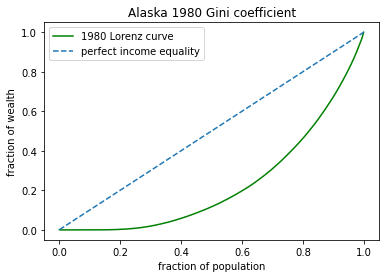

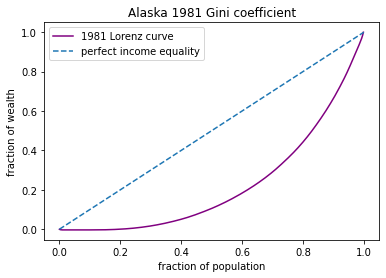

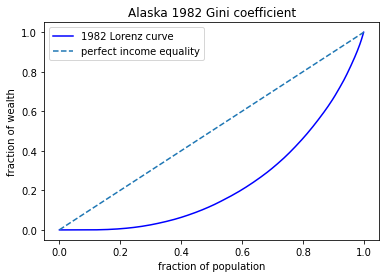

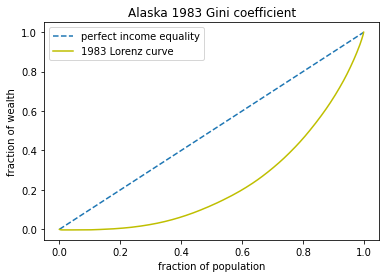

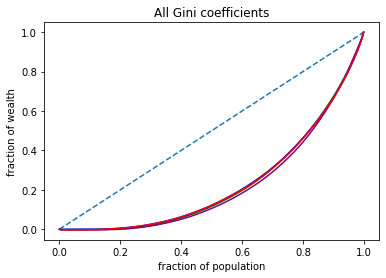

In [36]:
#Visualizing the Gini coefficient for Alaska by year
#Year 1980
plt.figure()
a=(0,1)
b=(0,1)
x1980=np.arange(0,1,1/dfinc1980Alaska['INCTOT'].count())
y1980=dfinc1980Alaska['INCTOT'].sort_values().cumsum()/dfinc1980Alaska['INCTOT'].sum()
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1980 Gini coefficient")
plt.plot(x1980,y1980,'g',label="1980 Lorenz curve")
plt.plot(a,b,'--',label = "perfect income equality")
plt.legend()
#Year 1981
plt.figure()
a=(0,1)
b=(0,1)
x1981=np.arange(0,dfinc1981Alaska['INCTOT'].count()/(1+dfinc1981Alaska['INCTOT'].count()),1/(1+dfinc1981Alaska['INCTOT'].count()))
y1981=dfinc1981Alaska['INCTOT'].sort_values().cumsum()/dfinc1981Alaska['INCTOT'].sum()
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1981 Gini coefficient")
plt.plot(x1981,y1981,'purple',label="1981 Lorenz curve")
plt.plot(a,b,'--',label = "perfect income equality")
plt.legend()
#Year 1982
plt.figure()
a=(0,1)
b=(0,1)
x1982=np.arange(0,1,1/dfinc1982Alaska['INCTOT'].count())
y1982=dfinc1982Alaska['INCTOT'].sort_values().cumsum()/dfinc1982Alaska['INCTOT'].sum()
plt.plot(x1982,y1982,'blue',label="1982 Lorenz curve")
plt.plot(a,b,'--',label = "perfect income equality")
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1982 Gini coefficient")
plt.legend()
#Year 1983
plt.figure()
a=(0,1)
b=(0,1)
x1983=np.arange(0,1,1/dfinc1983Alaska['INCTOT'].count())
y1983=dfinc1983Alaska['INCTOT'].sort_values().cumsum()/dfinc1983Alaska['INCTOT'].sum()
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("Alaska 1983 Gini coefficient")
plt.plot(a,b,'--',label = "perfect income equality")
plt.plot(x1983,y1983,'y',label="1983 Lorenz curve")
plt.legend()
plt.figure()
a=(0,1)
b=(0,1)
plt.xlabel("fraction of population")
plt.ylabel("fraction of wealth")
plt.title("All Gini coefficients")
plt.plot(a,b,'--',label = "perfect income equality")
plt.plot(x1980,y1980,'g',label="1980 Lorenz curve")
plt.plot(x1981,y1981,'purple',label="1981 Lorenz curve")
plt.plot(x1982,y1982,'blue',label="1982 Lorenz curve")
plt.plot(x1983,y1983,'r',label="1983 Lorenz curve")

In [37]:
y1981.count()

1576

In [38]:
#Gini coefficients for Alaska across four years
z = integrate.simpson(y1980,x1980)
print(2*z)
z = integrate.simpson(y1981,x1981)
print(2*z)
z = integrate.simpson(y1982,x1982)
print(2*z)
z = integrate.simpson(y1983,x1983)
print(2*z)

0.45770890428961447
0.4400485789362664
0.4625995769006863
0.460035711725711


For Alaska, we see that income inequality increased significantly from 1980 to 1981 but then shot down singnificantly as soon as the Alaska permanent fund was introduced in 1982. This makes a lot of sense as a 1000 dollars means a lot more to people who are unemployed or on benefits compared to people who are wealthy as a percentage of their income. For example, If someone is earning 200 a month their incomes sextuples compared to someone earning 2000 whose income only increases 50%.

In [39]:
dfx1980 = np.arange(0,1,1/dfinc1980['INCTOT'].count())
dfy1980 = dfinc1980['INCTOT'].sort_values().cumsum()/dfinc1980['INCTOT'].sum()
dfx1981 = np.arange(0,1,1/dfinc1981['INCTOT'].count())
dfy1981 = dfinc1981['INCTOT'].sort_values().cumsum()/dfinc1981['INCTOT'].sum()
dfx1982 = np.arange(0,dfinc1982['INCTOT'].count()/(1+dfinc1982['INCTOT'].count()),1/(1+dfinc1982['INCTOT'].count()))
dfy1982 = dfinc1982['INCTOT'].sort_values().cumsum()/dfinc1982['INCTOT'].sum()
dfx1983 = np.arange(0,1,1/dfinc1983['INCTOT'].count())
dfy1983 = dfinc1983['INCTOT'].sort_values().cumsum()/dfinc1983['INCTOT'].sum()

In [40]:
dfx1982.size

123980

In [41]:
dfy1982.size

123980

In [42]:
dfinc1981.size

413406

In [43]:
z = integrate.simpson(dfy1980,dfx1980)
print(2*z)
z = integrate.simpson(dfy1981,dfx1981)
print(2*z)
z = integrate.simpson(dfy1982,dfx1982)
print(2*z)
z = integrate.simpson(dfy1983,dfx1983)
print(2*z)

0.4532104946304944
0.45579558683923893
0.45141586429915004
0.4464037177355853


In [44]:
#Printing the Gini coefficients for each state
for x in incomedataframes:
    why = x['INCTOT'].sort_values().cumsum()/x['INCTOT'].sum()
    eks = np.arange(0,1,1/x['INCTOT'].count())
    eksit = np.arange(0,x['INCTOT'].count()/(1+x['INCTOT'].count()),1/(1+x['INCTOT'].count()))
    if  why.size == eks.size:
        z1 = integrate.simpson(why, eks)
        print(2*z1)
    elif why.size == eksit.size:
        z2 = integrate.simpson(why, eksit)
        print(2*z2)

0.41842274779113464
0.45770890428961447
0.44389861901607064
0.44655044429099455
0.4561838510397472
0.47104969978714223
0.4704207028021559
0.44284033598284406
0.4704518150361152
0.47400969918819874
0.4416832931090384
0.4958518597906478
0.4493901585351361
0.4608426170524722
0.47403459537476833
0.4692913362648214
0.4889602798372699
0.4406699357060229
0.41750099165147014
0.4770555315473795
0.45236009942345257
0.4669506758553023
0.4577398044643193
0.46414695251345517
0.43454134630870567
0.46760022368193105
0.45118191826362847
0.46220360758001994
0.4786611316583871
0.4970427786706262
0.4517690954141944
0.4176278213175036
0.4438752198227009
0.4606616647700006
0.4482070044110996
0.45146865898836075
0.4398104135227928
0.4732125041430407
0.45873339729000334
0.49137459918325765
0.4343290117198212
0.4557709264707809
0.44741856252810763
0.43354947215083406
0.46663570044280234
0.47614921268424637
0.4562091240196518
0.4711191381866011
0.42526919575634997
0.47171421386512175
0.4775369569319945
0.43051

In [45]:
#Calculating the percentage of unreported incomes by year
a = dfinc1980['INCTOT'].count()/dfallinc1980['INCTOT'].count()
b = dfinc1981['INCTOT'].count()/dfallinc1981['INCTOT'].count()
c = dfinc1982['INCTOT'].count()/dfallinc1982['INCTOT'].count()
d = dfinc1983['INCTOT'].count()/dfallinc1983['INCTOT'].count()
print("Percentage of unreported population = " + str(a))
print("Percentage of unreported population = " + str(b))
print("Percentage of unreported population = " + str(c))
print("Percentage of unreported population = " + str(d))

Percentage of unreported population = 0.7579178788680243
Percentage of unreported population = 0.7598341402088686
Percentage of unreported population = 0.7620019298968058
Percentage of unreported population = 0.7645525255941218


This means that about 76% of incomes were reported and that about 76% of people did not have a pre-tax personal income of greater than a million dollars in each year. Therefore, with a,b,c and d representing the percentage of people who weren't millionaires in each year, we get the equation average mean income in 1980 = non-millionaire mean income in 1980* percentage non-millionaire in 1980+ millionaire mean income in 1980* percentage millionaire in 1980.


Taking percentage non-millionaires as a,b,c or d depending on the year, the percentage millionaires as (1-a),(1-b),(1-c),(1-d) and the average pre-tax personal incomes as 21020, 22390, 23430, 24580. We only need non-millionaire mean incomes in each year which are calculated in the next cell below.

In [46]:
#Calculating the mean of reported incomes in each year in each state
e = dfinc1980['INCTOT'].mean()
f = dfinc1981['INCTOT'].mean()
g = dfinc1982['INCTOT'].mean()
h = dfinc1983['INCTOT'].mean()
print("Mean income of reported population in 1980= " + str(e))
print("Mean income of reported population in 1981= " + str(f))
print("Mean income of reported population in 1982= " + str(g))
print("Mean income of reported population in 1983= " + str(h))

Mean income of reported population in 1980= 9017.828051732786
Mean income of reported population in 1981= 9754.323413303146
Mean income of reported population in 1982= 10718.48132763349
Mean income of reported population in 1983= 11317.7068672945


Rearranging the equation for average mean income in terms of millionaire mean income we get, avg millionaire inc = (avg mean inc - non-millionaire mean income * percentage non-millionaires)/percent millionaire

In [47]:
#Calculating millionaire mean incomes by year
#1980
millionmeaninc1980 = (21020 - 9017.828051732786*0.7579178788680243)/(1-0.7579178788680243)
print("Mean income of millionaires in 1980 = " + str(millionmeaninc1980))
#1981
millionmeaninc1981 = (22390 - 9754.323413303146*0.7598341402088686)/(1-0.7598341402088686)
print("Mean income of millionaires in 1981 = " + str(millionmeaninc1981))
#1982
millionmeaninc1982 = (23430 - 10718.48132763349*0.7579178788680243)/(1-0.7579178788680243)
print("Mean income of millionaires in 1982 = " + str(millionmeaninc1982))
#1983
millionmeaninc1983 = (24580 - 9754.323413303146*0.7598341402088686)/(1-0.7598341402088686)
print("Mean income of millionaires in 1983 = " + str(millionmeaninc1983))

Mean income of millionaires in 1980 = 58596.75561625128
Mean income of millionaires in 1981 = 62366.6164248324
Mean income of millionaires in 1982 = 63227.59936132993
Mean income of millionaires in 1983 = 71485.31465240152


In [48]:
#Printing the percentage of the population whose race is classified as "white"
for x in racedataframes:
    a = x["RACE"].count()
    b = x[x["RACE"] == 100].count()
    z=b/a
    print(z["RACE"])

0.7112897588255854
0.7873941674506115
0.9522605121719886
0.8524064171122995
0.8696054457735775
0.9585338763420955
0.9271523178807947
0.8193581780538303
0.2915068493150685
0.8235940648470416
0.8004420587306599
0.3256997455470738
0.9840848806366048
0.8454136271923017
0.9192419825072886
0.9751508697195598
0.9343645484949833
0.9140206921155904
0.7117374241883696
0.9849561220225658
0.7652173913043478
0.9465383587276129
0.8712976022566996
0.9734513274336283
0.6840731070496083
0.8808426596445029
0.9303822937625754
0.9651581898277933
0.9048455056179775
0.99169921875
0.882837528604119
0.913984461709212
0.8404284790839412
0.7650527622594662
0.9403669724770642
0.9071312803889789
0.8716881150643452
0.9585566273669167
0.9003574620196604
0.9623091603053435
0.714219546086151
0.9319117096894874
0.8433485288023208
0.893239625167336
0.9646171693735499
0.9938271604938271
0.8004223864836325
0.9219143576826196
0.9691613388491914
0.9515267175572519
0.9745140388768898
0.7350667603654252
0.7839851024208566
0.

In [49]:
#Printing the percentage of the population whose race is classified as "black"
for x in racedataframes:
    a = x["RACE"].count()
    b = x[x["RACE"] == 200].count()
    z=b/a
    print(z["RACE"])

0.28661307235232436
0.045155221072436504
0.019285488460322478
0.13975044563279856
0.06529641134095565
0.01888189559422436
0.06385998107852413
0.17443064182194618
0.6975342465753425
0.16266715515662208
0.1910325228923271
0.0066157760814249365
0.0007578628268283441
0.14123855346888095
0.07434402332361516
0.01845935392261271
0.058946488294314384
0.08312522297538352
0.2839814484480913
0.0071040534893439195
0.21436672967863893
0.03875968992248062
0.11301128349788435
0.010619469026548672
0.3121969414397613
0.10829493087557604
0.002414486921529175
0.030436523828594315
0.06425561797752809
0.0029296875
0.105720823798627
0.019700332963374027
0.137501154307877
0.21477343265052762
0.004204892966360856
0.08654781199351702
0.06775170325510976
0.014648088603072526
0.09219541257074769
0.02862595419847328
0.27234830940250115
0.001122334455667789
0.14877745544964774
0.0999553770638108
0.0034802784222737818
0.000949667616334283
0.19148187258007743
0.023389708528247573
0.0285821737495299
0.043129770992366

In [50]:
#Printing the percentage of the population whose race is classified as "other"
for x in racedataframes:
    a = x["RACE"].count()
    b = x[x["RACE"] == 700].count()
    z=b/a
    print(z["RACE"])

0.0020971688220901784
0.16745061147695203
0.028453999367688904
0.00784313725490196
0.06509814288546692
0.022584228063680118
0.008987701040681173
0.006211180124223602
0.010958904109589041
0.013738779996336326
0.008525418377012947
0.6676844783715012
0.015157256536566882
0.013347819338817322
0.00641399416909621
0.006389776357827476
0.006688963210702341
0.0028540849090260435
0.004281127363539065
0.007939824488090262
0.020415879017013232
0.014701951349906442
0.01569111424541608
0.01592920353982301
0.003729951510630362
0.010862409479921
0.06720321931589537
0.004405286343612335
0.03089887640449438
0.00537109375
0.011441647597254004
0.06631520532741399
0.022070366608181735
0.020173805090006207
0.05542813455657492
0.006320907617504052
0.06056018168054504
0.02679528403001072
0.0074471254095918975
0.009064885496183206
0.013432144511347846
0.06696595585484474
0.007874015748031496
0.0068049977688531904
0.031902552204176336
0.0052231718898385565
0.008095740936290039
0.05469593378913278
0.00225648740